<a href="https://colab.research.google.com/github/Sakib1605/Early_Patient_Readmission_Prediction/blob/main/Data_6300_Early_Patient_Readmission_Prediction_Mohammad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Mohammad Sakibul Islam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###
# Import libraries
###
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
###
# Load the dataset
###
diabetic_df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
ids_mapping_df = pd.read_csv('/content/drive/MyDrive/IDS_mapping.csv')

In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### Removing duplicate records

In [ ]:
diabetic_df.shape

(101766, 50)

In [ ]:
len(np.unique(diabetic_df['patient_nbr']))

71518

So, we can observe that there are 71518 distinct entries.So, we can remove the duplicate records.

In [ ]:
diabetic_df.drop_duplicates(subset = 'patient_nbr', inplace= True)

In [ ]:
diabetic_df.shape

(71518, 50)

In [ ]:
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Handling missing data

In [ ]:
missing_percentage = (diabetic_df[diabetic_df=='?'].count()/ len(diabetic_df))* 100
non_zero_missing_percentage = missing_percentage[missing_percentage > 0]
non_zero_missing_percentage

race                  2.723790
weight               96.010794
payer_code           43.405856
medical_specialty    48.207444
diag_1                0.015381
diag_2                0.411085
diag_3                1.712856
dtype: float64

Text(0.5, 0, 'missing data percentage')

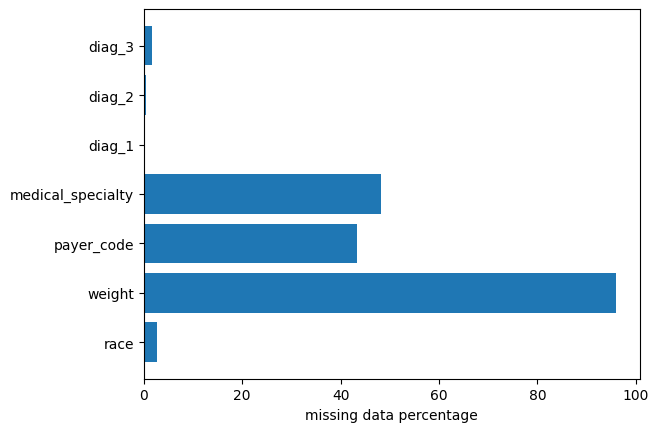

In [ ]:
###
# Create a bar plot to better visualize
###
plt.barh(non_zero_missing_percentage.index, non_zero_missing_percentage.values)
plt.xlabel("missing data percentage")

In [ ]:
# Removing columns with high proportion of missing values
diabetic_df = diabetic_df.drop('weight', axis = 1)

In [ ]:
# Value counts for race column
diabetic_df['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
?                   1948
Hispanic            1517
Other               1178
Asian                497
Name: race, dtype: int64

In [ ]:
# replacing the missing race with the most frequent race
most_frequent_race = diabetic_df['race'].mode()[0]
diabetic_df['race'] = diabetic_df['race'].replace('?', most_frequent_race)

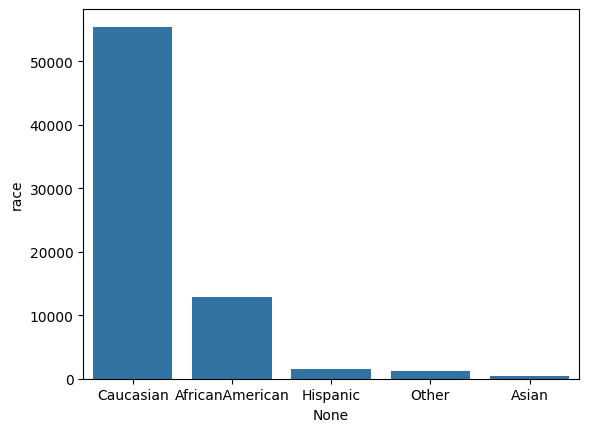

In [ ]:
sns.barplot(x=diabetic_df['race'].value_counts().index, y=diabetic_df['race'].value_counts())
plt.show()

In [ ]:
diabetic_df['citoglipton'].value_counts()

No    71518
Name: citoglipton, dtype: int64

In [ ]:
len(diabetic_df['citoglipton'].unique())

1

In [ ]:
diabetic_df['examide'].value_counts()

No    71518
Name: examide, dtype: int64

In [ ]:
len(diabetic_df['examide'].unique())

1

Here, for citoglipton and examide columns, all records have the same value, so dropping these columns

In [ ]:
# Removing columns with same value for all records
diabetic_df = diabetic_df.drop(['examide', 'citoglipton'], axis = 1)

In [ ]:
# Removing columns that are irrelevant
diabetic_df = diabetic_df.drop(['encounter_id', 'patient_nbr','payer_code'], axis = 1)

In [ ]:
diabetic_df['medical_specialty'].value_counts()

?                                   34477
InternalMedicine                    10919
Family/GeneralPractice               5118
Emergency/Trauma                     4465
Cardiology                           4266
                                    ...  
SportsMedicine                          1
Dermatology                             1
Proctology                              1
Surgery-PlasticwithinHeadandNeck        1
Resident                                1
Name: medical_specialty, Length: 71, dtype: int64

In [ ]:
# dropping the medical_specialty column as more than 48% data points are missing
diabetic_df = diabetic_df.drop('medical_specialty', axis = 1)

In [ ]:
diabetic_df['gender'].value_counts()

Female             38025
Male               33490
Unknown/Invalid        3
Name: gender, dtype: int64

In [ ]:
# As there are only 3 unknow/invalid record, remove these records
diabetic_df = diabetic_df[diabetic_df['gender'] !='Unknown/Invalid']

#### Handling Diag Features

In [ ]:
## If any 'diag_1', 'diag_2', 'diag_3' features contains 'E' or 'V' replace it with 0
diabetic_df[['diag_1', 'diag_2', 'diag_3']] = diabetic_df[['diag_1', 'diag_2', 'diag_3']].applymap(
    lambda x: 0 if 'E' in str(x) or 'V' in str(x) else x)

In [ ]:
# Replace the misssing values with the most frequent values of the column
diabetic_df[['diag_1', 'diag_2', 'diag_3']] = diabetic_df[['diag_1', 'diag_2', 'diag_3']]. replace('?', np.nan)
diabetic_df[['diag_1', 'diag_2', 'diag_3']] = diabetic_df[['diag_1', 'diag_2', 'diag_3']].fillna(diabetic_df.mode().iloc[0])

In [ ]:
# Changing data type top float
diabetic_df[['diag_1', 'diag_2', 'diag_3']] = diabetic_df[['diag_1', 'diag_2', 'diag_3']].astype(float)

In [ ]:
## According to the list of ICD-9 code, " (https://en.wikipedia.org/wiki/List_of_ICD-9_codes)" mapping the diag features
def diagnosis_category(x):
  if int(x) in range(1,140):
    return 'infectious'
  elif int(x) in range(140,240):
    return 'neoplasms'
  elif int(x) in range(240,280):
    return 'endocrine'
  elif int(x) in range(280,290):
    return 'blood_diseases'
  elif int(x) in range(290,320):
    return 'mental_disorder'
  elif int(x) in range(320,390):
    return 'nervous system'
  elif int(x) in range(390,460):
    return 'circulatory'
  elif int(x) in range(460,520):
    return 'respiratory'
  elif int(x) in range(520,580):
    return 'digestive'
  elif int(x) in range(580,630):
    return 'genitourinary'
  elif int(x) in range(630,680):
    return 'pregnancy'
  elif int(x) in range(680,710):
    return 'skin'
  elif int(x) in range(710,740):
    return 'musculokskeletal'
  elif int(x) in range(740,760):
    return 'congenital'
  elif int(x) in range(760,780):
    return 'perinatal'
  elif int(x) in range(780,800):
    return 'symptoms'
  elif int(x) in range(800,1000):
    return 'injury'
  else:
    return 'other'


for col in ['diag_1', 'diag_2', 'diag_3']:
  diabetic_df[col] = diabetic_df[col].map(diagnosis_category)


In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71515 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71515 non-null  object
 1   gender                    71515 non-null  object
 2   age                       71515 non-null  object
 3   admission_type_id         71515 non-null  int64 
 4   discharge_disposition_id  71515 non-null  int64 
 5   admission_source_id       71515 non-null  int64 
 6   time_in_hospital          71515 non-null  int64 
 7   num_lab_procedures        71515 non-null  int64 
 8   num_procedures            71515 non-null  int64 
 9   num_medications           71515 non-null  int64 
 10  number_outpatient         71515 non-null  int64 
 11  number_emergency          71515 non-null  int64 
 12  number_inpatient          71515 non-null  int64 
 13  diag_1                    71515 non-null  object
 14  diag_2               

In [ ]:
ids_mapping_df

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


#### Mapping 'admission_type_id'

In [ ]:
#Admission Type has 'Urgent'(id-2), 'Emergency'(id-1), 'Trauma Center'(id-7) values -
# So need to simplify the categories as they denote the identical meanings
# So, 'Urgent', 'Trauma Center' is mapped to one single type 'Emergency'
diabetic_df['admission_type_id'].replace([2,7], [1,1], inplace = True)

In [ ]:
#Admission Type has 'Not Available'(id-5), 'NaN'(id-6), 'Not Mapped'(id-8) values -
# So need to simplify the categories as they denote the identical meanings
# So, , 'NaN'(id-6), 'Not Mapped'(id-8) is mapped to one single type Not Available'(id-5)
diabetic_df['admission_type_id'].replace([6,8], [5,5], inplace = True)

In [ ]:
diabetic_df['admission_type_id'].unique()

array([5, 1, 3, 4])

In [ ]:
# mapping admission type
admission_type_mapping = { 1 : 'Emergency', 3: 'Elective',
                           4 : 'Newborn', 5: 'Other'}
diabetic_df['admission_type_id'] = diabetic_df['admission_type_id'].replace(admission_type_mapping)

In [ ]:
diabetic_df['admission_type_id'].unique()

array(['Other', 'Emergency', 'Elective', 'Newborn'], dtype=object)

#### Mapping 'admission_source_id'

In [ ]:
diabetic_df['admission_source_id'].unique()

array([ 1,  7,  2,  4,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13])

In [ ]:
#Admission source id has 'Physician Referral'(id-1), 'Clinic Referral'(id-2), 'HMO Referral'(id-3) values -
# So need to simplify the categories as they denote the identical  referral meanings
# So, 'Physician Referral'(id-1), 'Clinic Referral'(id-2), 'HMO Referral'(id-3) is mapped to one single type Physician Referral
diabetic_df['admission_source_id'].replace([1,2,3], ' Referral', inplace = True)

In [ ]:
# Admission source id has
#'Transfer from a hospital' (id-4)
#'Transfer from a Skilled Nursing Facility (SNF)' (id-5)
#'Transfer from another health care facility' (id-6)
# 'Transfer from critial access hospital' (id- 10)
#'Transfer From Another Home Health Agency; (id- 18)
#'Transfer from hospital inpt/same fac reslt in a sep claim',(id-22)
# Transfer from Ambulatory Surgery Center'(id-25),
#'Transfer from Hospice'(id-26),
# So need to simplify the categories as they denote the identical  'transfer' meanings
# so these are mapped to one single type
diabetic_df['admission_source_id'].replace([4,5,6,10,18,22,25,26],'Transfer', inplace = True)

In [ ]:
diabetic_df['admission_source_id'].replace(7,'Emergency Room', inplace = True)


In [ ]:
diabetic_df['admission_source_id'].replace(8,'Court/Law Enforcement', inplace = True)
diabetic_df['admission_source_id'].replace(13,'Sick Baby', inplace = True)
# As 'Not Available' (id-9), 'NaN'(id -17) ,' Not Mapped'(id-20) represent missing value, so map them to 'missing source'
diabetic_df['admission_source_id'].replace([9,17,20],'missing source', inplace = True)
# As 'Extramural Birth' (id-14), 'Normal Delivery'(id -11) represent birth/delivery value, so map them to 'delivery'
diabetic_df['admission_source_id'].replace([11,14],'delivery', inplace = True)

In [ ]:
diabetic_df['admission_source_id'].unique()

array([' Referral', 'Emergency Room', 'Transfer', 'missing source',
       'Court/Law Enforcement', 'delivery', 'Sick Baby'], dtype=object)

#### Mapping 'discharge_disposition_id'

In [ ]:
diabetic_df['discharge_disposition_id'].value_counts()

1     44315
3      8784
6      8289
18     2474
2      1539
22     1409
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [ ]:
diabetic_df['discharge_disposition_id'].replace(1,'Home', inplace = True)

In [ ]:
diabetic_df['discharge_disposition_id'].unique()

array([25, 'Home', 3, 6, 2, 5, 11, 7, 10, 14, 4, 18, 8, 12, 13, 17, 16,
       22, 23, 9, 15, 20, 28, 24, 19, 27], dtype=object)

In [ ]:
diabetic_df.shape

(71515, 43)

In [ ]:
# mapping discharge_disposition
discharge_disposition_mapping = { 2 : 'Short Term Hospital', 3: 'SNF',
                                  4 : 'ICF', 5: 'Other Inpatient Care',
                                  6 : 'Home with Health Service',
                                  7 : 'Left AMA', 8: 'Home with IV Provider',
                                  9 : 'Admitted', 10: 'Neonate Aftercare',
                                  11 : 'Expired', 12: 'Outpatient',
                                  13 : 'Hospice', 14: 'Hospice',
                                  15 : 'Medicare Swing Bed', 16: 'Outpatient',
                                  17 : 'Outpatient', 18: 'Unknown',
                                  19: 'Expired',
                                  20: 'Expired', 21: 'Expired',
                                  22: 'Rehab Facility', 23: 'Long Term Care Hospital',
                                  24: 'Nursing Facility (Medicaid)', 25: 'Unknown',
                                  26: 'Unknown',
                                  27: 'Federal Health Care Facility', 28:'Psychiatric Hospital',
                                  29: 'Critical Access Hospital', 30: 'Other Health Care Institution'}
diabetic_df['discharge_disposition_id'] = diabetic_df['discharge_disposition_id'].replace(discharge_disposition_mapping)

In [ ]:
diabetic_df['discharge_disposition_id'].value_counts()

Home                            44315
SNF                              8784
Home with Health Service         8289
Unknown                          3252
Short Term Hospital              1539
Rehab Facility                   1409
Expired                          1084
Other Inpatient Care              913
ICF                               541
Hospice                           461
Left AMA                          409
Long Term Care Hospital           260
Psychiatric Hospital               90
Home with IV Provider              73
Medicare Swing Bed                 40
Nursing Facility (Medicaid)        25
Outpatient                         13
Admitted                            9
Neonate Aftercare                   6
Federal Health Care Facility        3
Name: discharge_disposition_id, dtype: int64

In [ ]:
# replacing the missing unknown data with the most frequent value
#most_frequent = diabetic_df['discharge_disposition_id'].mode()[0]
#diabetic_df['discharge_disposition_id'] = diabetic_df['discharge_disposition_id'].replace('Unknown', most_frequent_race)

In [ ]:
diabetic_df['discharge_disposition_id'].value_counts()

Home                            44315
SNF                              8784
Home with Health Service         8289
Unknown                          3252
Short Term Hospital              1539
Rehab Facility                   1409
Expired                          1084
Other Inpatient Care              913
ICF                               541
Hospice                           461
Left AMA                          409
Long Term Care Hospital           260
Psychiatric Hospital               90
Home with IV Provider              73
Medicare Swing Bed                 40
Nursing Facility (Medicaid)        25
Outpatient                         13
Admitted                            9
Neonate Aftercare                   6
Federal Health Care Facility        3
Name: discharge_disposition_id, dtype: int64

In [ ]:
expired_records = diabetic_df[diabetic_df['discharge_disposition_id'].str.contains('Expired')]
expired_records['readmitted'].value_counts()

NO    1084
Name: readmitted, dtype: int64

In [ ]:
diabetic_df['discharge_disposition_id'].value_counts()

Home                            44315
SNF                              8784
Home with Health Service         8289
Unknown                          3252
Short Term Hospital              1539
Rehab Facility                   1409
Expired                          1084
Other Inpatient Care              913
ICF                               541
Hospice                           461
Left AMA                          409
Long Term Care Hospital           260
Psychiatric Hospital               90
Home with IV Provider              73
Medicare Swing Bed                 40
Nursing Facility (Medicaid)        25
Outpatient                         13
Admitted                            9
Neonate Aftercare                   6
Federal Health Care Facility        3
Name: discharge_disposition_id, dtype: int64

#### Handling Age Feature

In [ ]:
diabetic_df['age'].value_counts()

[70-80)     18208
[60-70)     15959
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: age, dtype: int64

In [ ]:
diabetic_df.shape

(71515, 43)

In [ ]:
# Replacing the age range by the mid value of that range

replace_age_range = {
    '[0-10)':  0,  '[10-20)':1,
    '[20-30)': 2, '[30-40)':3,
    '[40-50)': 4, '[50-60)':5,
    '[60-70)': 6, '[70-80)': 7,
    '[80-90)': 8, '[90-100)': 9
}

diabetic_df['age'] = diabetic_df['age'].map(replace_age_range)

In [ ]:
diabetic_df.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000
mean,6.065161,4.289170,43.075858,1.430525,15.704999,0.280081,0.103545,0.177837,7.245753
std,1.597833,2.949188,19.952151,1.759848,8.311201,1.068978,0.509197,0.603801,1.994651
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,6.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,9.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


#### Handling Numerical Features and Handling Outliers

In [ ]:
# Get the numeric columns
numerical_columns = diabetic_df.select_dtypes(include =['number']).columns.tolist()
numerical_columns

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

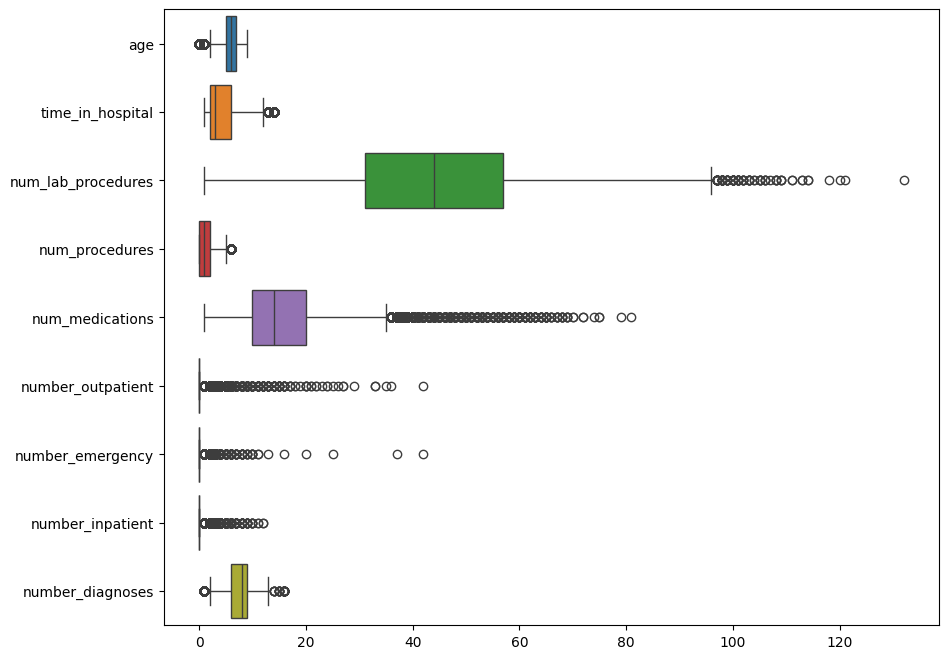

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data= diabetic_df[numerical_columns], orient= 'h')
plt.show()

In [ ]:
diabetic_df.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000,71515.000000
mean,6.065161,4.289170,43.075858,1.430525,15.704999,0.280081,0.103545,0.177837,7.245753
std,1.597833,2.949188,19.952151,1.759848,8.311201,1.068978,0.509197,0.603801,1.994651
min,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,6.000000,3.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,9.000000,14.000000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


In [ ]:
diabetic_df['num_lab_procedures'].quantile(0.9999)

112.69719999999506

In [ ]:
diabetic_df['num_medications'].quantile(0.9999)

70.0

In [ ]:
diabetic_df['number_emergency'].quantile(0.9999)

10.848599999997532

In [ ]:
diabetic_df['number_emergency'].value_counts()

0     66311
1      3965
2       804
3       246
4        96
5        33
6        26
8         9
7         8
10        5
9         4
11        2
13        1
42        1
25        1
37        1
20        1
16        1
Name: number_emergency, dtype: int64

In [ ]:
## Handling outlier from the visualization
#from the boxplot visualization above code , we see that 99.99% of the data points below 11 for number_emergency feature
# so now removing the outliers that deviates significantly from other observations
threshold_number_emergency = 20
diabetic_df =diabetic_df[diabetic_df['number_emergency'] <= threshold_number_emergency]

In [ ]:
diabetic_df.shape

(71512, 43)

In [ ]:
diabetic_df['number_inpatient'].quantile(0.9999)

10.0

In [ ]:
diabetic_df['number_inpatient'].value_counts()

0     63073
1      5961
2      1547
3       489
4       235
5       102
6        56
7        19
8        13
9         8
10        5
11        2
12        2
Name: number_inpatient, dtype: int64

In [ ]:
diabetic_df['number_outpatient'].quantile(0.9999)

26.84889999999723

In [ ]:
diabetic_df['number_outpatient'].value_counts()

0     62207
1      4867
2      2025
3      1115
4       585
5       288
6       128
7        73
8        57
9        37
10       28
11       19
12       14
13       13
14       10
15       10
16        8
17        4
20        4
27        2
33        2
24        2
22        2
18        2
21        2
19        1
29        1
42        1
36        1
26        1
35        1
25        1
23        1
Name: number_outpatient, dtype: int64

In [ ]:
## Handling outlier from the visualization
#from the boxplot visualization above code , we see that 99.99% of the data points below 27 for number_outpatient feature
# so now removing the outliers that deviates significantly from other observations
threshold_number_outpatient = 30
diabetic_df =diabetic_df[diabetic_df['number_outpatient'] <= threshold_number_outpatient]

In [ ]:
diabetic_df['num_medications'].quantile(0.9999)

70.0

In [ ]:
diabetic_df['num_medications'].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       47, 44, 53, 57, 48, 62, 56, 59, 60, 63, 55, 58, 70, 67, 64, 69, 65,
       66, 68, 81, 79, 75, 72, 74])

In [ ]:
## Handling outlier from the visualization
#from the boxplot visualization above code , we see that 99.99% of the data points below 70 for num_medications feature
# so now removing the outliers that deviates significantly from other observations
threshold_num_medications = 75
diabetic_df =diabetic_df[diabetic_df['num_medications'] <= threshold_num_medications]

In [ ]:
diabetic_df['num_lab_procedures'].quantile(0.9999)

112.69919999997364

In [ ]:
## Handling outlier from the visualization
#from the boxplot visualization above code , we see that 99.99% of the data points below 111 for num_lab_procedures feature
# so now removing the outliers that deviates significantly from other observations
threshold_num_lab_procedures = 120
diabetic_df =diabetic_df[diabetic_df['num_lab_procedures'] <= threshold_num_lab_procedures]


In [ ]:
diabetic_df.shape

(71503, 43)

#### Handling Drug Medication Features

 Value counts for  Drug: metformin-pioglitazone
No        71502
Steady        1
Name: metformin-pioglitazone, dtype: int64


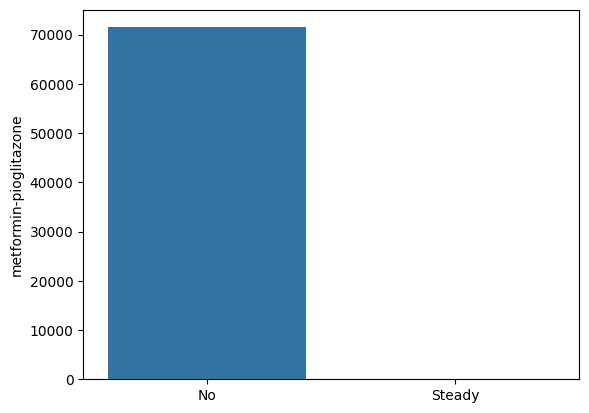



 Value counts for  Drug: metformin-rosiglitazone
No        71501
Steady        2
Name: metformin-rosiglitazone, dtype: int64


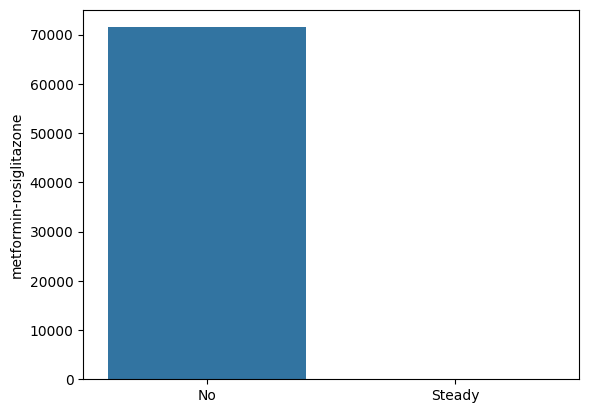



 Value counts for  Drug: metformin
No        56516
Steady    13714
Up          838
Down        435
Name: metformin, dtype: int64


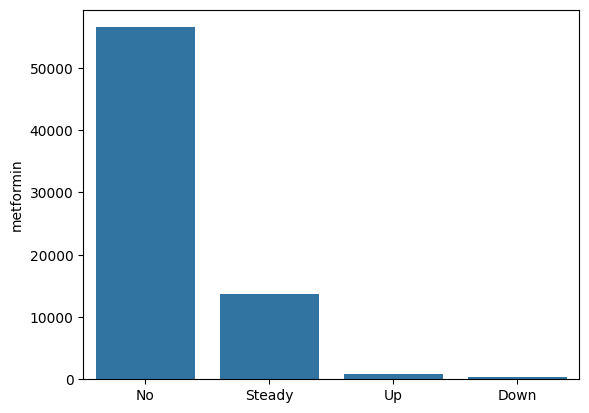



 Value counts for  Drug: repaglinide
No        70577
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64


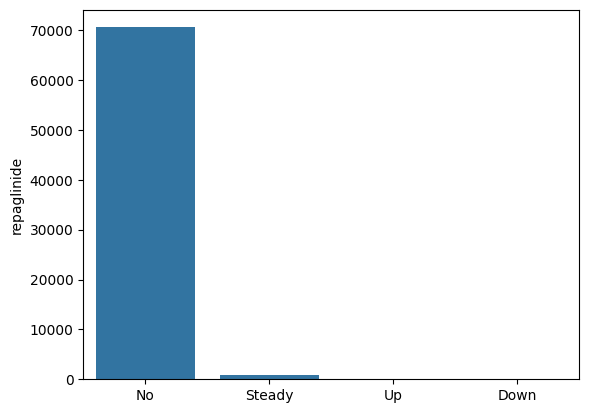



 Value counts for  Drug: nateglinide
No        71005
Steady      474
Up           16
Down          8
Name: nateglinide, dtype: int64


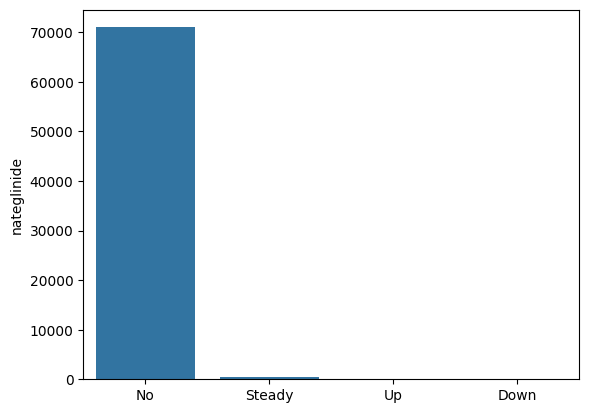



 Value counts for  Drug: chlorpropamide
No        71431
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64


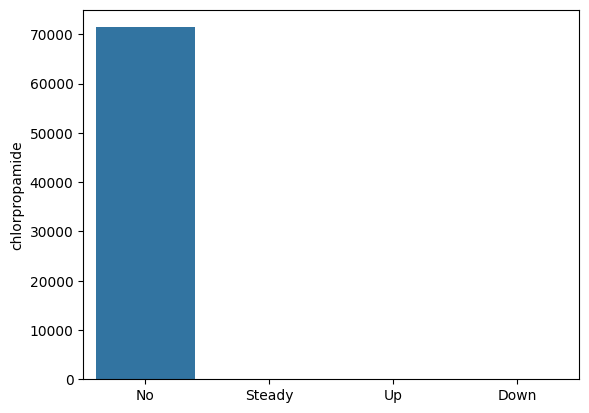



 Value counts for  Drug: glimepiride
No        67759
Steady     3371
Up          235
Down        138
Name: glimepiride, dtype: int64


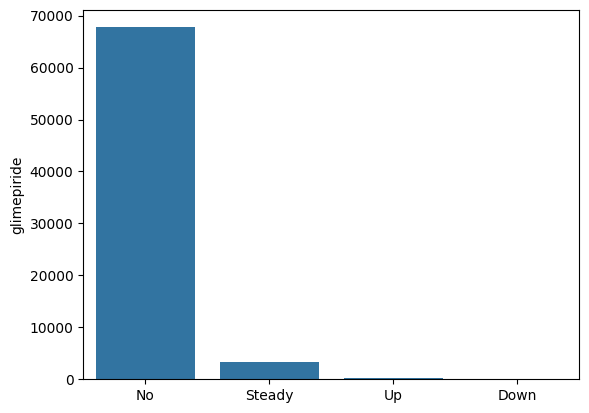



 Value counts for  Drug: acetohexamide
No        71502
Steady        1
Name: acetohexamide, dtype: int64


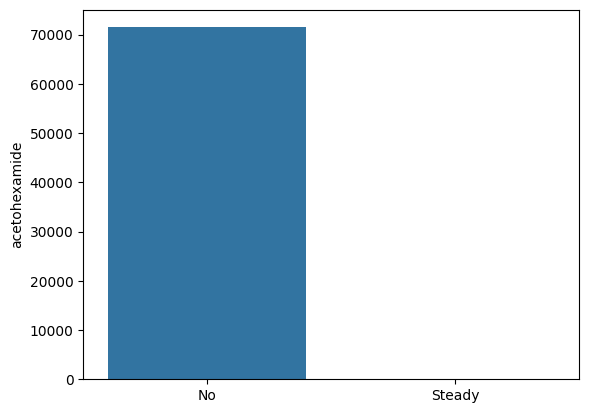



 Value counts for  Drug: glipizide
No        62399
Steady     8148
Up          578
Down        378
Name: glipizide, dtype: int64


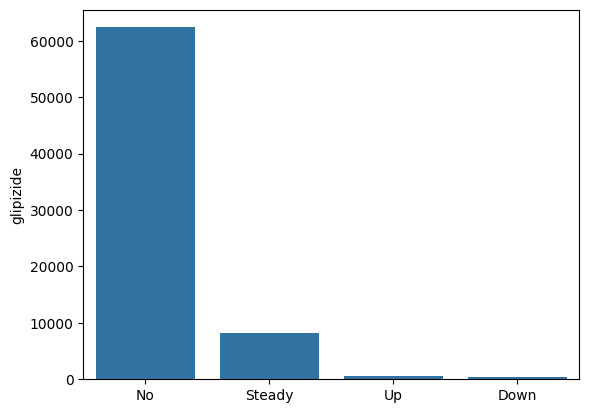



 Value counts for  Drug: glyburide
No        63652
Steady     6809
Up          621
Down        421
Name: glyburide, dtype: int64


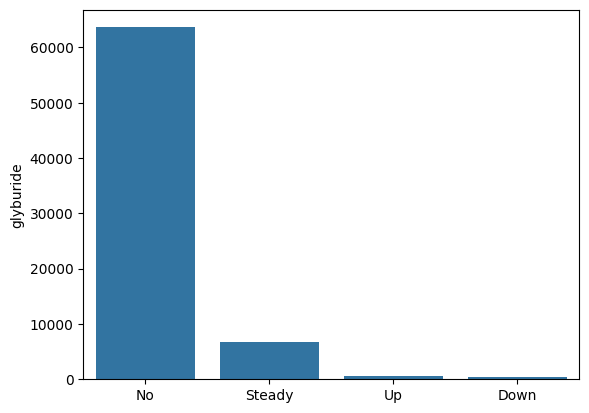



 Value counts for  Drug: tolbutamide
No        71484
Steady       19
Name: tolbutamide, dtype: int64


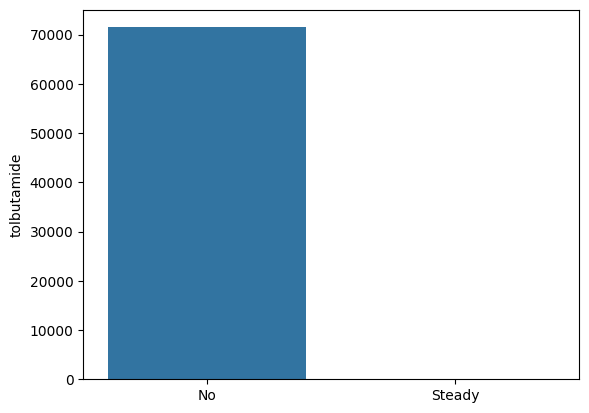



 Value counts for  Drug: pioglitazone
No        66197
Steady     5045
Up          180
Down         81
Name: pioglitazone, dtype: int64


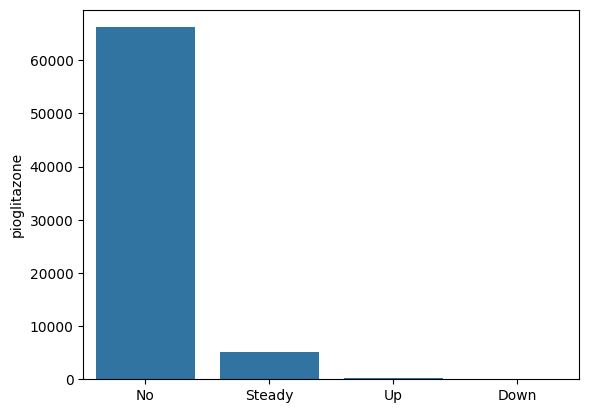



 Value counts for  Drug: rosiglitazone
No        66804
Steady     4488
Up          136
Down         75
Name: rosiglitazone, dtype: int64


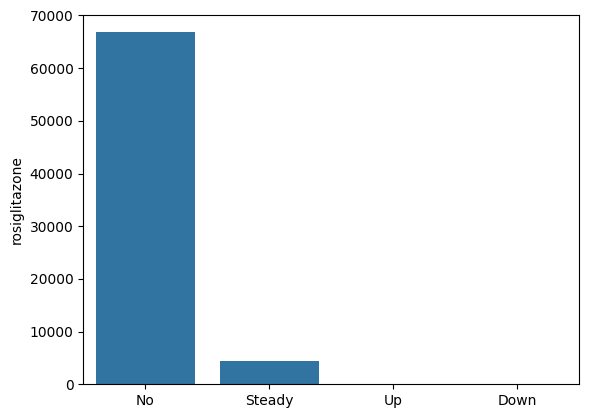



 Value counts for  Drug: acarbose
No        71301
Steady      192
Up           10
Name: acarbose, dtype: int64


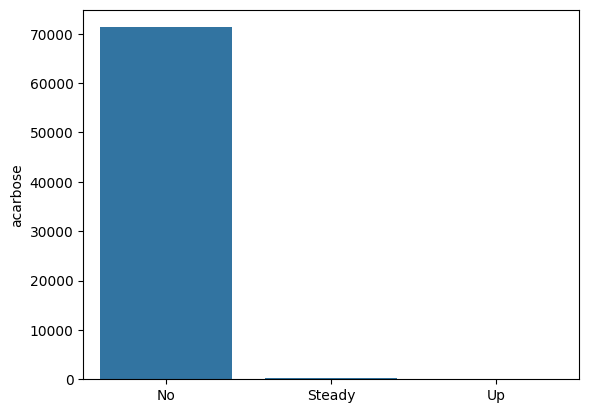



 Value counts for  Drug: miglitol
No        71483
Steady       18
Down          1
Up            1
Name: miglitol, dtype: int64


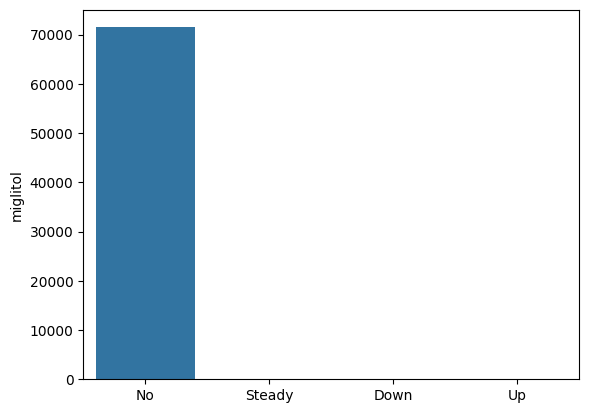



 Value counts for  Drug: troglitazone
No        71500
Steady        3
Name: troglitazone, dtype: int64


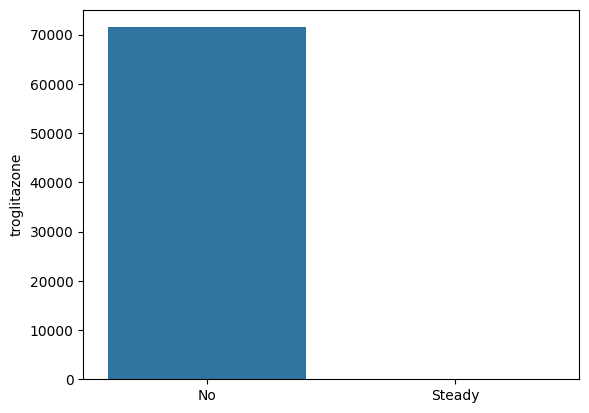



 Value counts for  Drug: tolazamide
No        71473
Steady       30
Name: tolazamide, dtype: int64


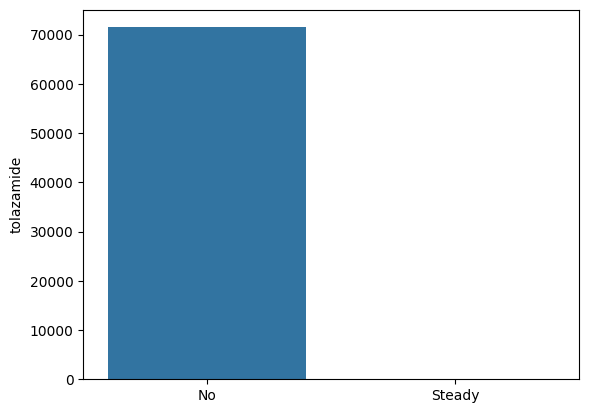



 Value counts for  Drug: insulin
No        34917
Steady    22124
Down       7503
Up         6959
Name: insulin, dtype: int64


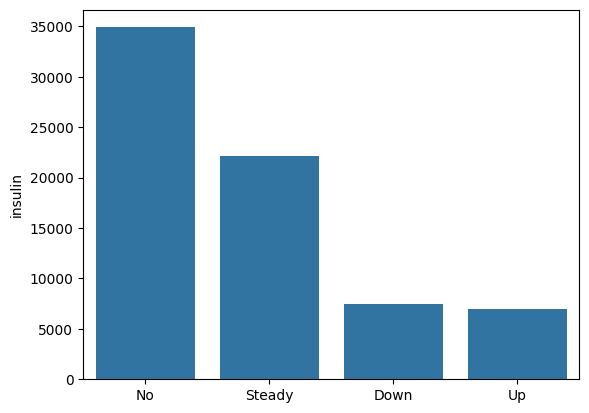



 Value counts for  Drug: glyburide-metformin
No        71001
Steady      491
Up            7
Down          4
Name: glyburide-metformin, dtype: int64


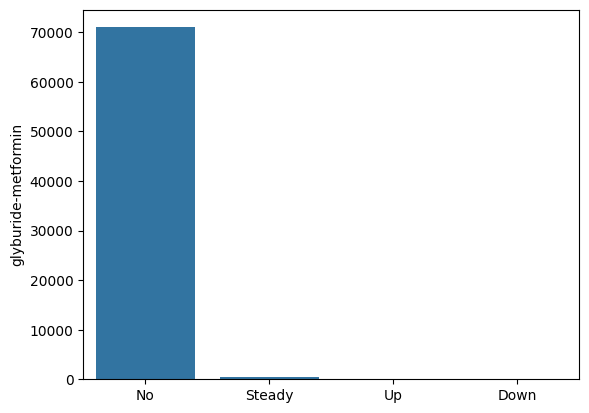



 Value counts for  Drug: glipizide-metformin
No        71496
Steady        7
Name: glipizide-metformin, dtype: int64


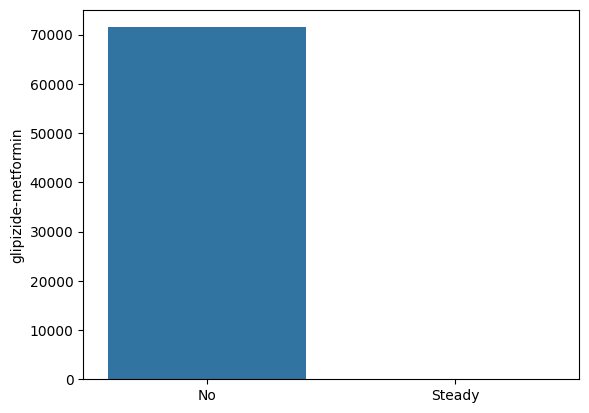



 Value counts for  Drug: glimepiride-pioglitazone
No    71503
Name: glimepiride-pioglitazone, dtype: int64


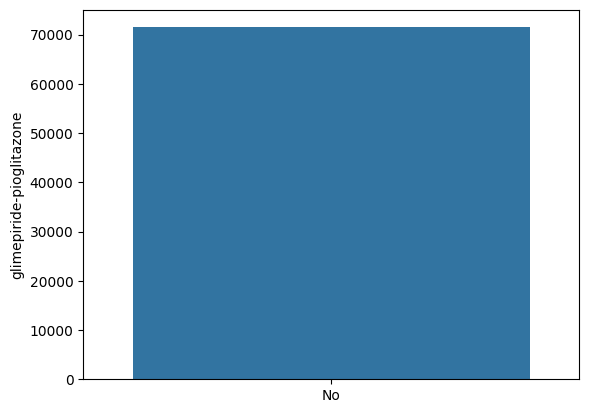

In [ ]:
drug_medications = ['metformin-pioglitazone','metformin-rosiglitazone',
           'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride',
           'acetohexamide','glipizide', 'glyburide','tolbutamide','pioglitazone',
           'rosiglitazone', 'acarbose','miglitol','troglitazone','tolazamide', 'insulin',
           'glyburide-metformin','glipizide-metformin', 'glimepiride-pioglitazone']
for col in drug_medications:
  print(" Value counts for  Drug:", col)
  print(diabetic_df[col].value_counts())
  sns.barplot(x=diabetic_df[col].value_counts().index, y=diabetic_df[col].value_counts())
  plt.xlabel('')
  plt.show()
  print("\n")

So, from above, it is observed that, 'glimepiride-pioglitazone', 'glipizide-metformin', 'tolazamide', 'troglitazone', 'miglitol','acarbose',
'tolbutamide', 'acetohexamide','chlorpropamide', 'repaglinide','nateglinide','metformin-pioglitazone', 'metformin-rosiglitazone' - these columns are extremely unbalanced which means most of the records(overwhelming majority) have the same value. So, I am dropping these columns as these columns don't provide any meaningful variation for prediction.

In [ ]:
cols = ['glimepiride-pioglitazone', 'glipizide-metformin', 'tolazamide', 'troglitazone', 'miglitol','acarbose',
           'tolbutamide', 'acetohexamide','chlorpropamide', 'repaglinide',
        'nateglinide','metformin-pioglitazone', 'metformin-rosiglitazone' ]

diabetic_df.drop(columns=cols, inplace =True)

In [ ]:
percentage_df = (diabetic_df.groupby(['insulin', 'readmitted']).size() / diabetic_df.groupby('insulin').size()) * 100

print(percentage_df)

insulin  readmitted
Down     <30           10.302546
         >30           33.973077
         NO            55.724377
No       <30            8.139302
         >30           30.134319
         NO            61.726380
Steady   <30            9.062556
         >30           30.853372
         NO            60.084072
Up       <30            9.642190
         >30           33.611151
         NO            56.746659
dtype: float64


As insulin feature does not significantly diffferentiate readmission rate across its categories, so, we will not apply label encoding for this feature, rather we will apply one hot encoding later

#### Handling max_glu_serum Feature

In [ ]:
# 'max_glu_serum' : Glucose serum test toc heck whether sugar level is in healthy range
diabetic_df['max_glu_serum'].value_counts()

None    68048
Norm     1731
>200      968
>300      756
Name: max_glu_serum, dtype: int64

In [ ]:
percentage_df = (diabetic_df.groupby(['max_glu_serum', 'readmitted']).size() / diabetic_df.groupby('max_glu_serum').size()) * 100

print(percentage_df)

max_glu_serum  readmitted
>200           <30           10.640496
               >30           33.884298
               NO            55.475207
>300           <30            9.656085
               >30           37.433862
               NO            52.910053
None           <30            8.742358
               >30           30.969316
               NO            60.288326
Norm           <30            9.589832
               >30           31.831311
               NO            58.578856
dtype: float64


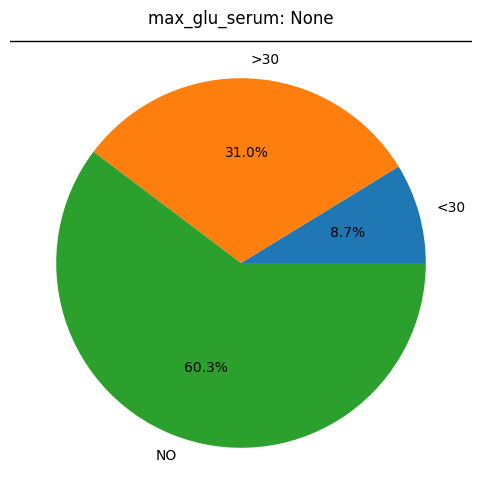

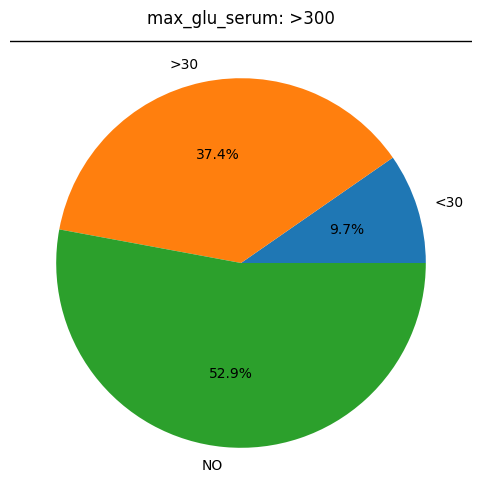

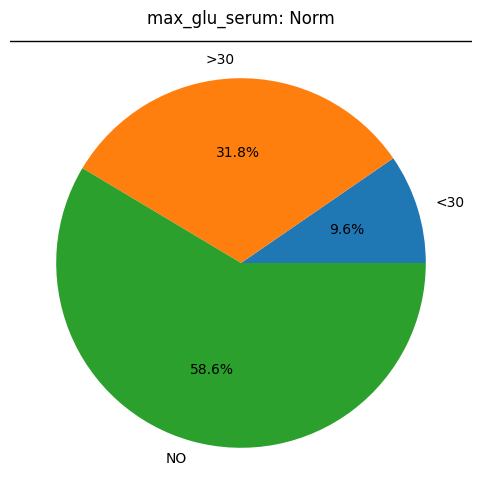

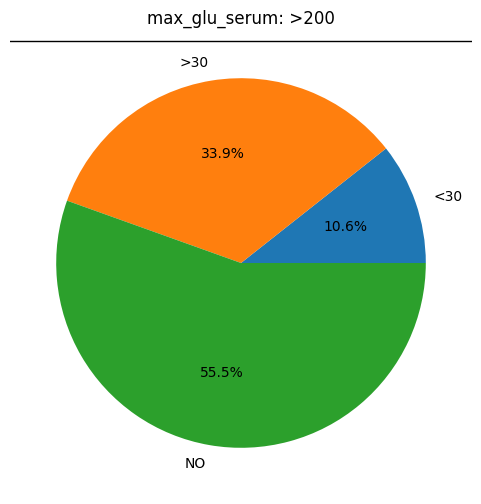

In [ ]:
for category in diabetic_df['max_glu_serum'].unique():
    percentages = percentage_df.loc[category]
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
    plt.title(f'max_glu_serum: {category}' )
    plt.axhline(1.2, color='black', linewidth=1)
    plt.show()

So from visualization, patients with higher glucose serum level (>200 and >300) ar emore likely to be readmiited than those having normal levels or None levels.

In [ ]:
# mapping max glu serum,
max_glu_serum_mapping = { 'None' : 0, 'Norm': 1,
                           '>200' : 2, '>300': 3}
diabetic_df['max_glu_serum'] = diabetic_df['max_glu_serum'].replace(max_glu_serum_mapping)

In [ ]:
diabetic_df['max_glu_serum'].value_counts()

0    68048
1     1731
2      968
3      756
Name: max_glu_serum, dtype: int64

#### Feature A1Cresult

In [ ]:
# 'A1Cresult' : indicates the  range of resultor if the test was not taken
diabetic_df['A1Cresult'].value_counts()

None    58520
>8       6303
Norm     3791
>7       2889
Name: A1Cresult, dtype: int64

In [ ]:
percentage_df = (diabetic_df.groupby(['A1Cresult', 'readmitted']).size() / diabetic_df.groupby('A1Cresult').size()) * 100

print(percentage_df)

A1Cresult  readmitted
>7         <30            8.480443
           >30           29.837314
           NO            61.682243
>8         <30            8.091385
           >30           31.096303
           NO            60.812312
None       <30            8.906357
           >30           31.396104
           NO            59.697539
Norm       <30            8.546558
           >30           27.459773
           NO            63.993669
dtype: float64


As A1Cresult feature does not significantly diffferentiate readmission rate across its categories, so, we will not apply label encoding for this feature

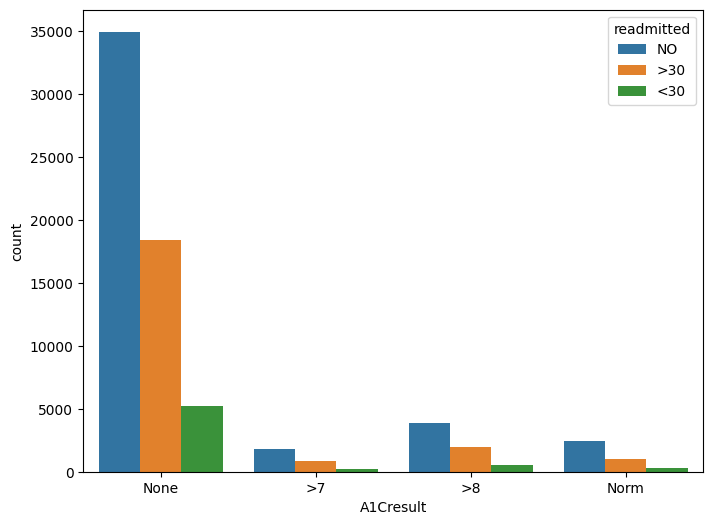

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_df, x='A1Cresult', hue='readmitted')
plt.show()

####  Handling diabetesMed feature

In [ ]:
diabetic_df['diabetesMed'].value_counts()

Yes    54305
No     17198
Name: diabetesMed, dtype: int64

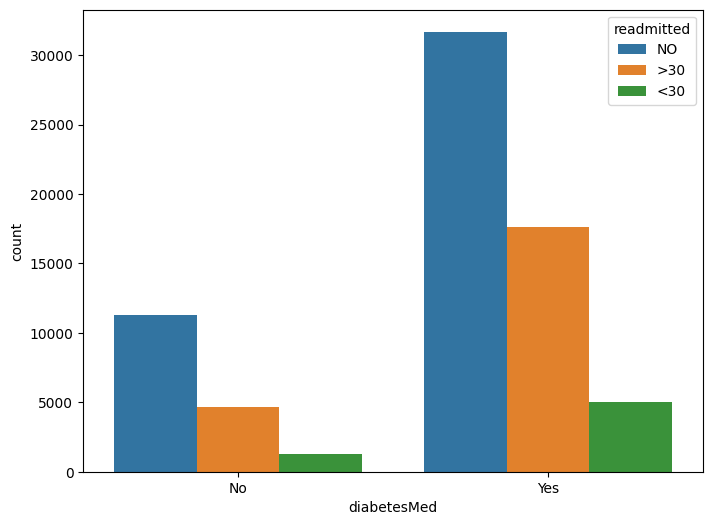

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_df, x='diabetesMed', hue='readmitted')
plt.show()

diabetesMed  readmitted
No           <30            7.343877
             >30           27.003140
             NO            65.652983
Yes          <30            9.258816
             >30           32.394807
             NO            58.346377
dtype: float64


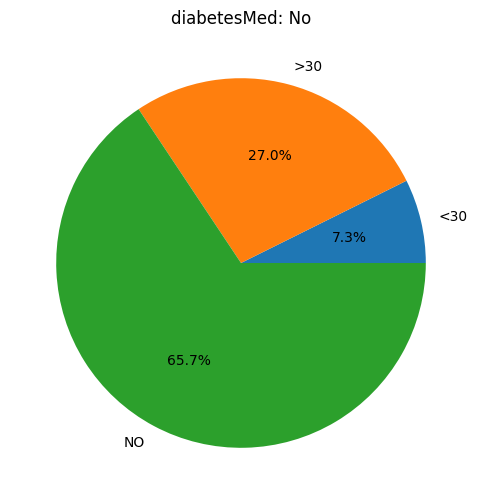

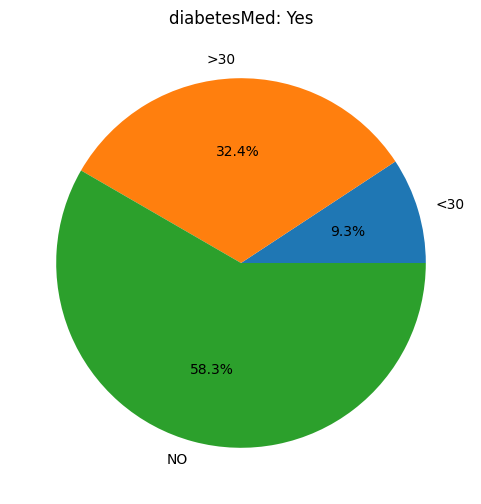

In [ ]:
percentage_df = (diabetic_df.groupby(['diabetesMed', 'readmitted']).size() / diabetic_df.groupby('diabetesMed').size()) * 100

print(percentage_df)
for category in diabetic_df['diabetesMed'].unique():
    percentages = percentage_df.loc[category]
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
    plt.title(f'diabetesMed: {category}' )
    plt.show()

As we can see from visualization and percentage distribution,  when diabetesMed is "yes", then the percentage of readmission is higher compared to when  diabetesMed is "No". So, there might be a correlation between the diabetesMed feature and the likelihood of readmission.

In [ ]:
# mapping diabetesMed,
diabetesMed_mapping = { 'No' : 0, 'Yes': 1}
diabetic_df['diabetesMed'] = diabetic_df['diabetesMed'].replace(diabetesMed_mapping)

#### Handling change feature

In [ ]:
diabetic_df['change'].value_counts()

No    39490
Ch    32013
Name: change, dtype: int64

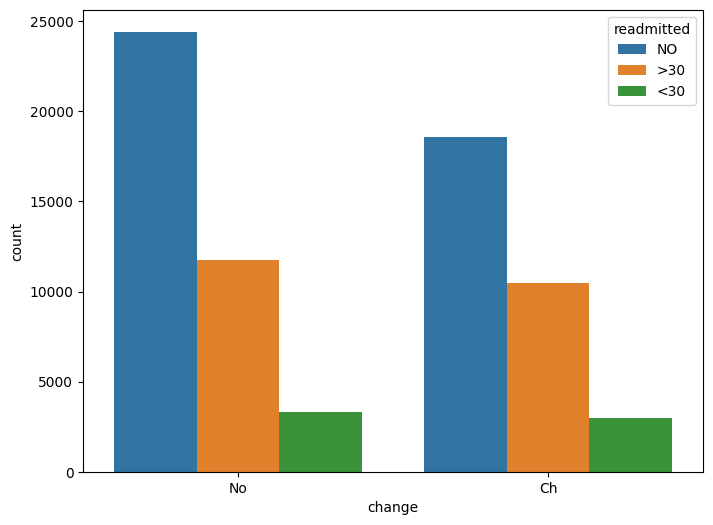

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_df, x='change', hue='readmitted')
plt.show()

In [ ]:
percentage_df = (diabetic_df.groupby(['change', 'readmitted']).size() / diabetic_df.groupby('change').size()) * 100

print(percentage_df)


change  readmitted
Ch      <30            9.299347
        >30           32.739824
        NO            57.960828
No      <30            8.391998
        >30           29.767030
        NO            61.840972
dtype: float64


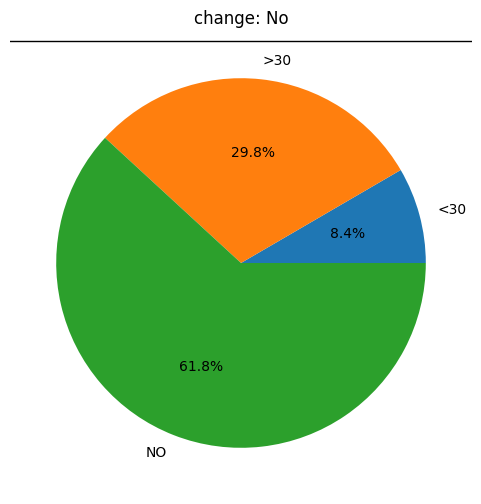

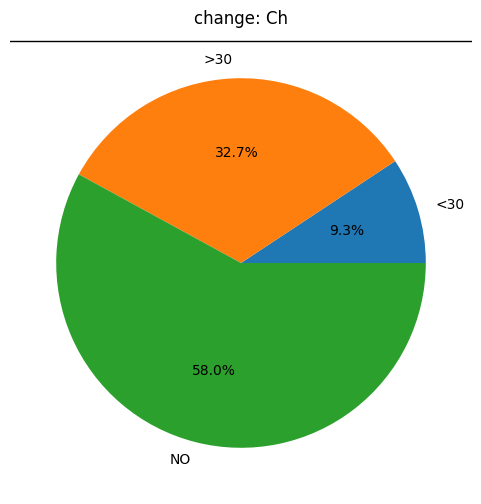

In [ ]:
for category in diabetic_df['change'].unique():
    percentages = percentage_df.loc[category]
    plt.figure(figsize=(6, 6))
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
    plt.title(f'change: {category}' )
    plt.axhline(1.2, color='black', linewidth=1)
    plt.show()

As we can see from visualization and percentage distribution,  when change is "Ch", then the percentage of readmission is higher compared to when  change is "No". So, there might be a correlation between the change feature and the likelihood of readmission.

In [ ]:
# mapping change,
change_mapping = { 'No' : 0, 'Ch': 1}
diabetic_df['change'] = diabetic_df['change'].replace(change_mapping)

#### Target Feature : readmitted

In [ ]:
diabetic_df['readmitted'].value_counts()

NO     42976
>30    22236
<30     6291
Name: readmitted, dtype: int64

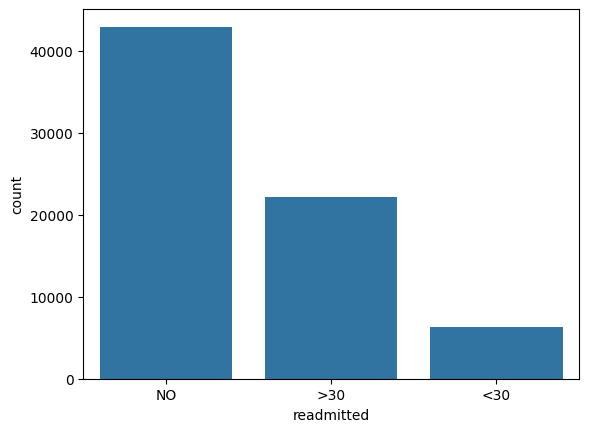

In [ ]:
sns.barplot(x=diabetic_df['readmitted'].value_counts().index, y=diabetic_df['readmitted'].value_counts())
plt.xlabel('readmitted')
plt.ylabel('count')
plt.show()

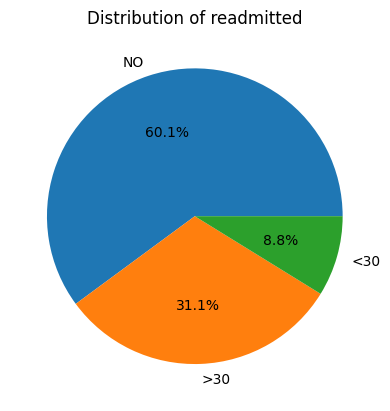

In [ ]:
plt.pie(diabetic_df['readmitted'].value_counts(),
        labels = diabetic_df['readmitted'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Distribution of readmitted')
plt.show()

In [ ]:
# As readmitted variable has three categories : 'NO', '>30' and '<30'
# mapping readmitted to numerical values
# 'NO' mapped to 0, indicates no readmission
# '>30' mapped to 1, indicates readmission after 30 days
# '<30' mapped to 2, indicates readmission within 30 days
readmitted_mapping = { 'NO' : 0, '>30': 1,'<30' : 2}
diabetic_df['readmitted'] = diabetic_df['readmitted'].replace(readmitted_mapping)

In [ ]:
diabetic_df['readmitted'].value_counts()

0    42976
1    22236
2     6291
Name: readmitted, dtype: int64

In [ ]:
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71503 entries, 0 to 101765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71503 non-null  object
 1   gender                    71503 non-null  object
 2   age                       71503 non-null  int64 
 3   admission_type_id         71503 non-null  object
 4   discharge_disposition_id  71503 non-null  object
 5   admission_source_id       71503 non-null  object
 6   time_in_hospital          71503 non-null  int64 
 7   num_lab_procedures        71503 non-null  int64 
 8   num_procedures            71503 non-null  int64 
 9   num_medications           71503 non-null  int64 
 10  number_outpatient         71503 non-null  int64 
 11  number_emergency          71503 non-null  int64 
 12  number_inpatient          71503 non-null  int64 
 13  diag_1                    71503 non-null  object
 14  diag_2               

#### Visualization

In [ ]:
numerical_columns = diabetic_df.select_dtypes(include =['number']).columns.tolist()
numerical_columns

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'max_glu_serum',
 'change',
 'diabetesMed',
 'readmitted']

<Axes: >

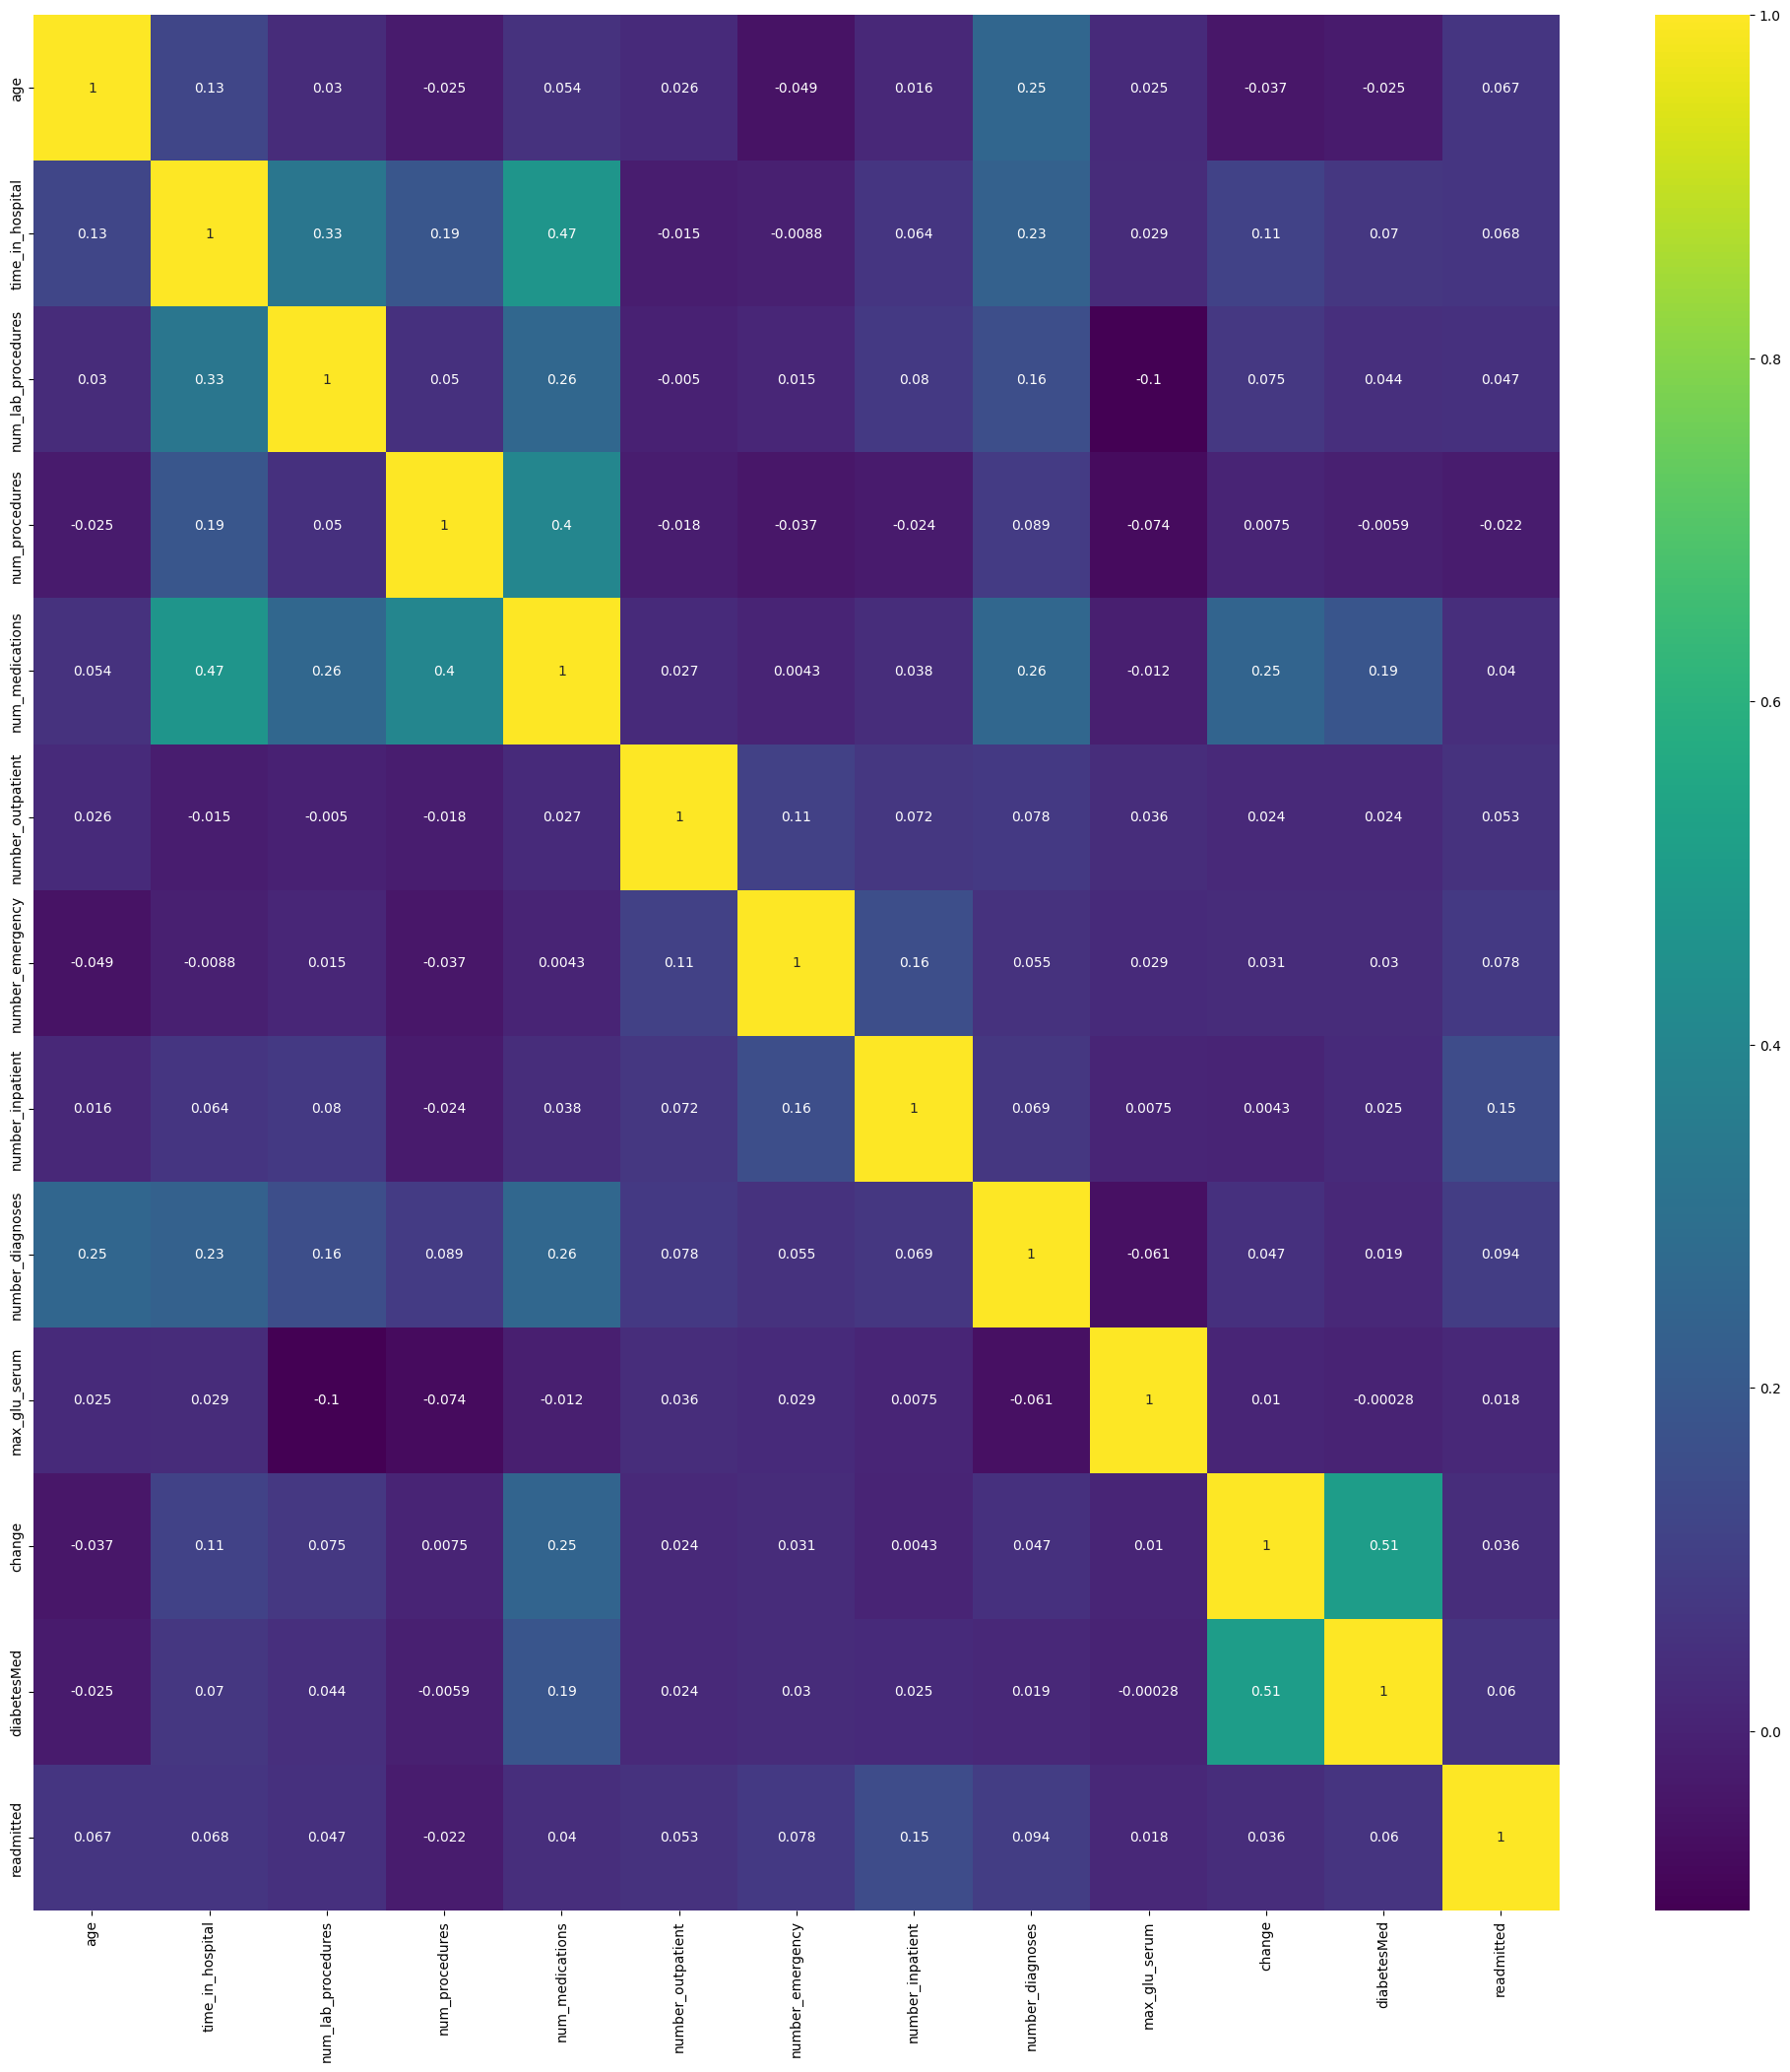

In [ ]:
## showing correlation
numerical_columns = diabetic_df.select_dtypes(include =['number']).columns.tolist()
plt.figure(figsize=(25,25))
sns.heatmap(diabetic_df[numerical_columns].corr(),annot=True,cmap="viridis")

In [ ]:
categorical_data = diabetic_df.select_dtypes(include = 'object')
categorical_column_name = categorical_data.columns.tolist()
categorical_column_name

['race',
 'gender',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag_1',
 'diag_2',
 'diag_3',
 'A1Cresult',
 'metformin',
 'glimepiride',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'glyburide-metformin']

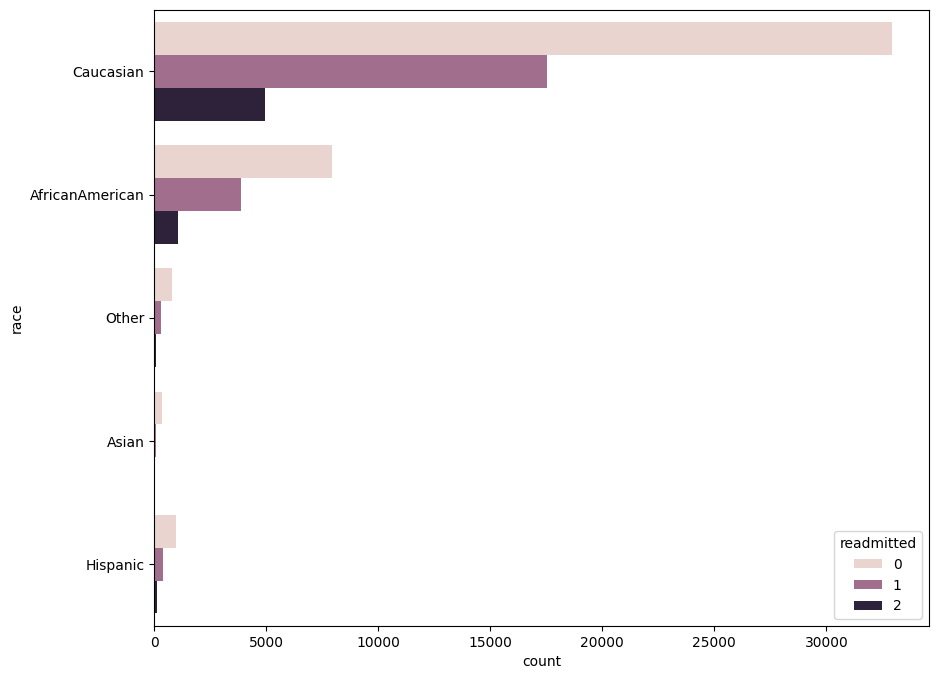

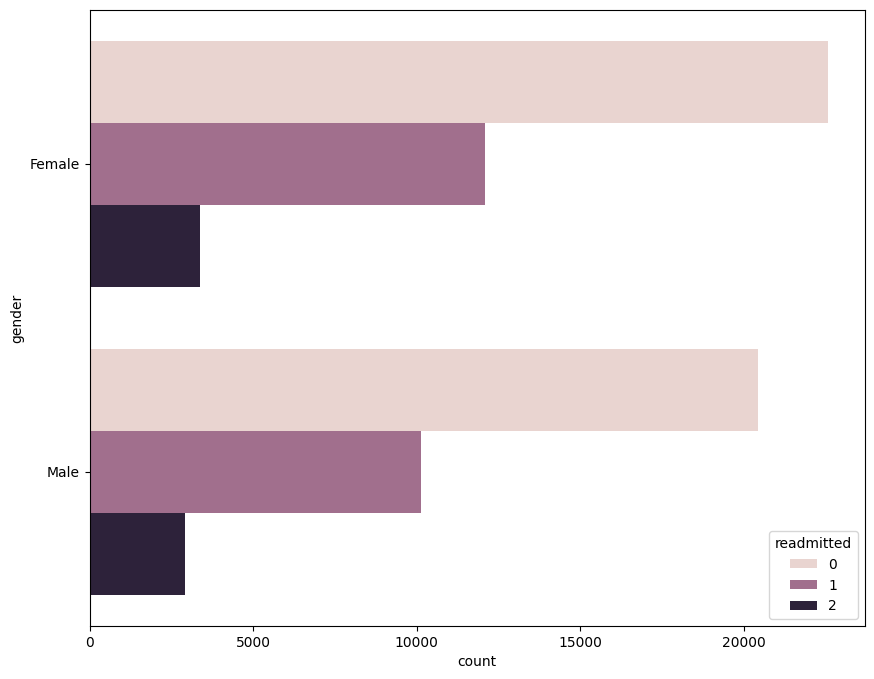

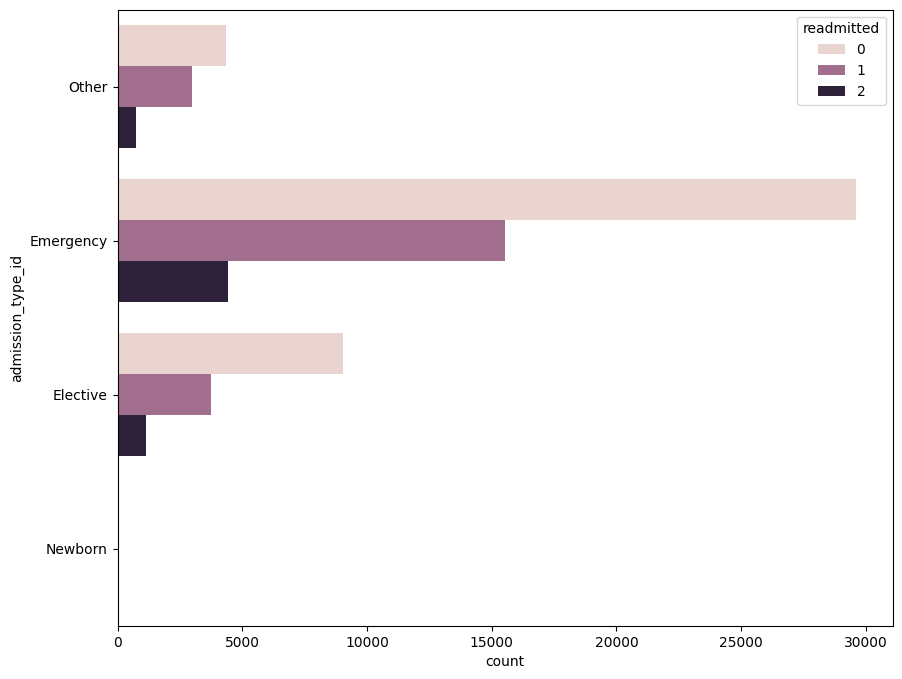

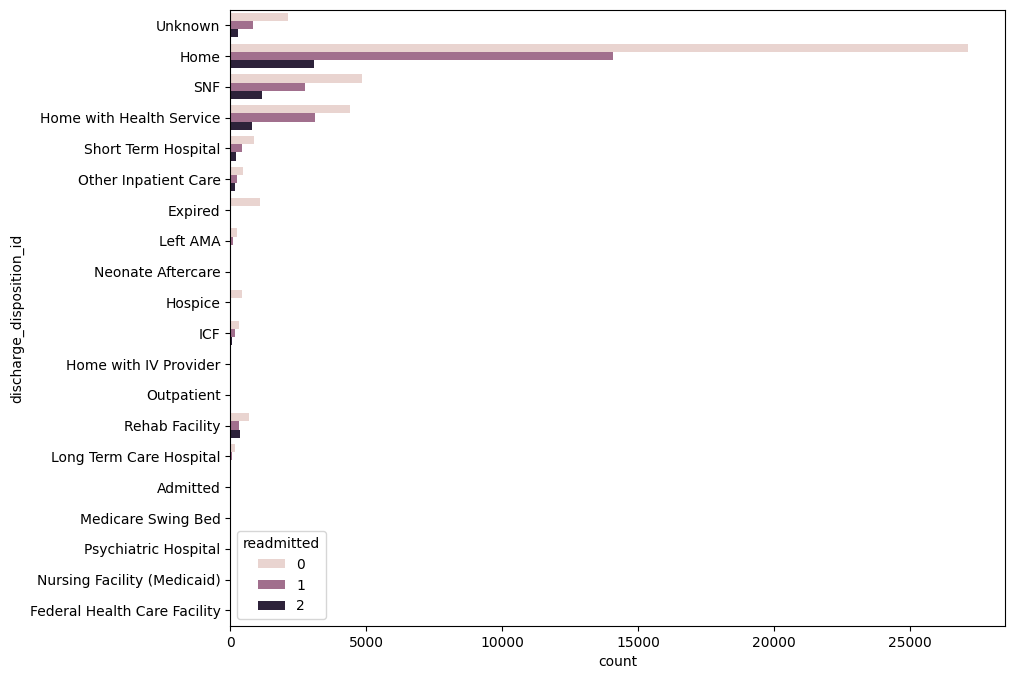

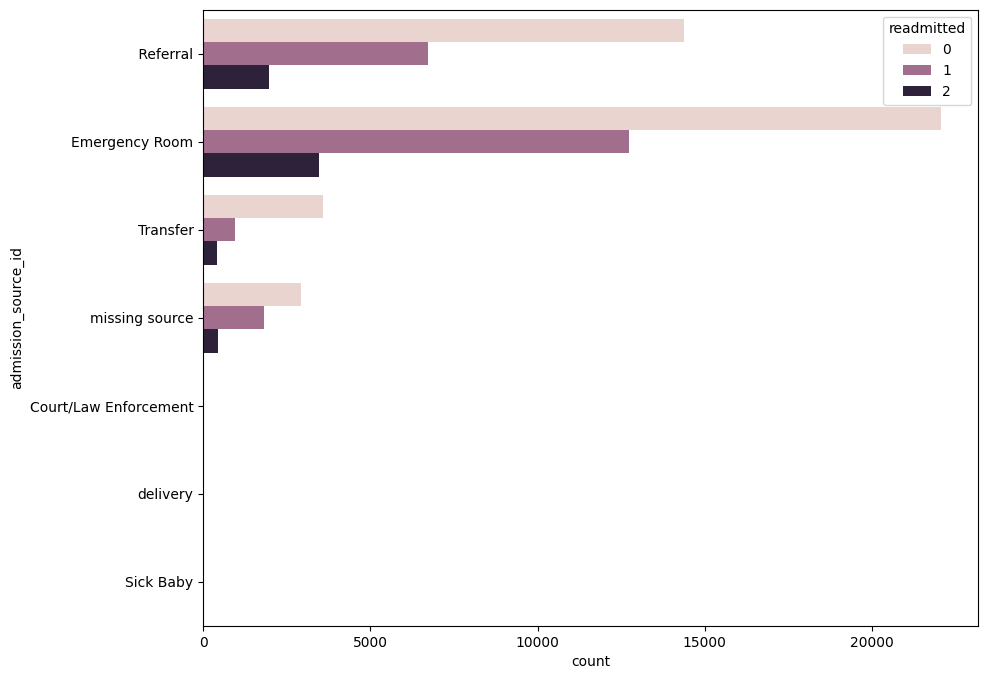

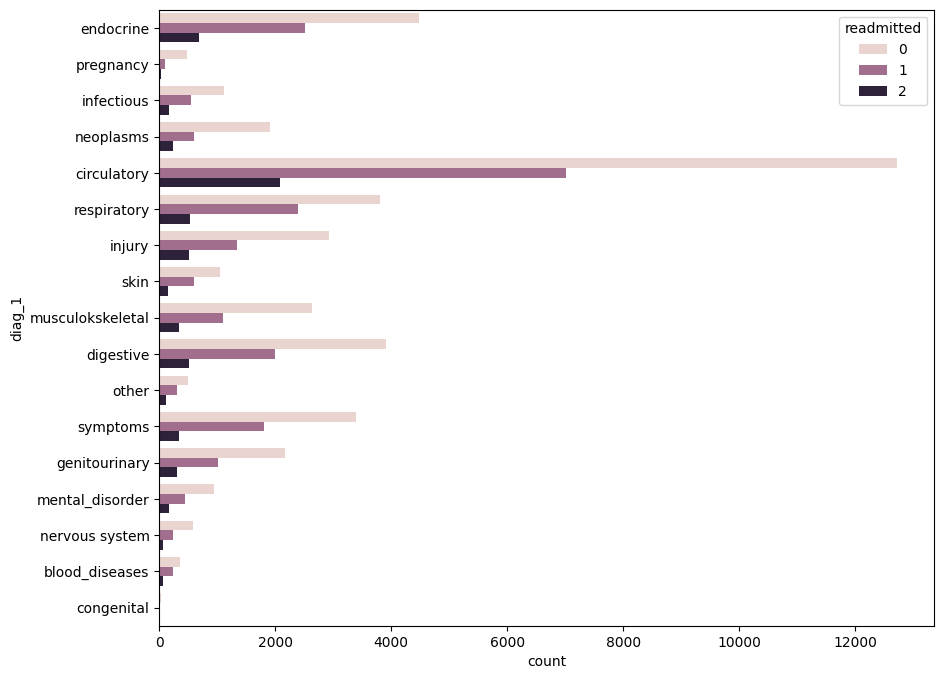

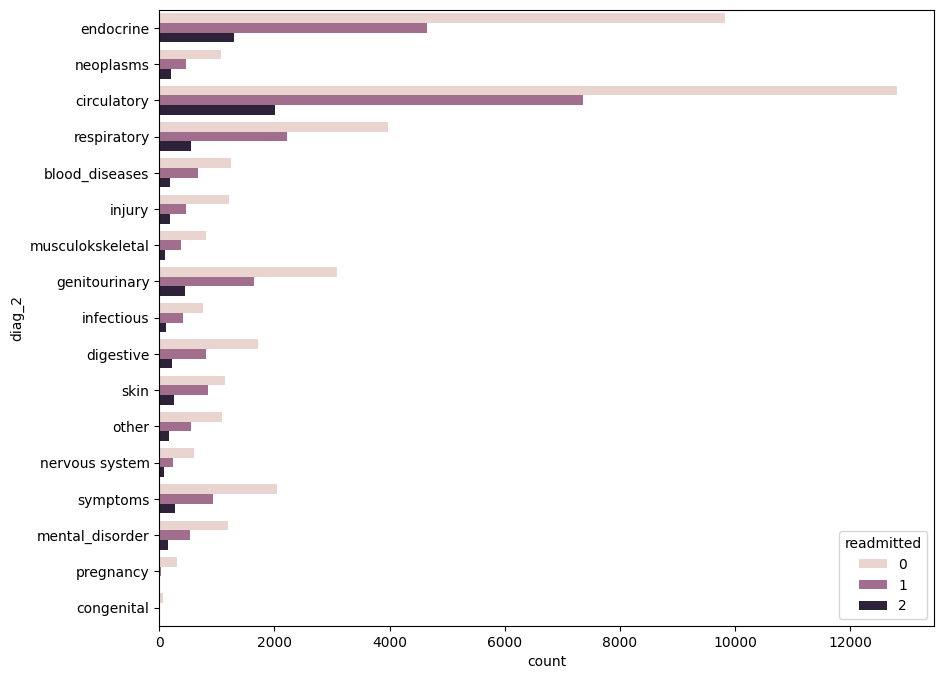

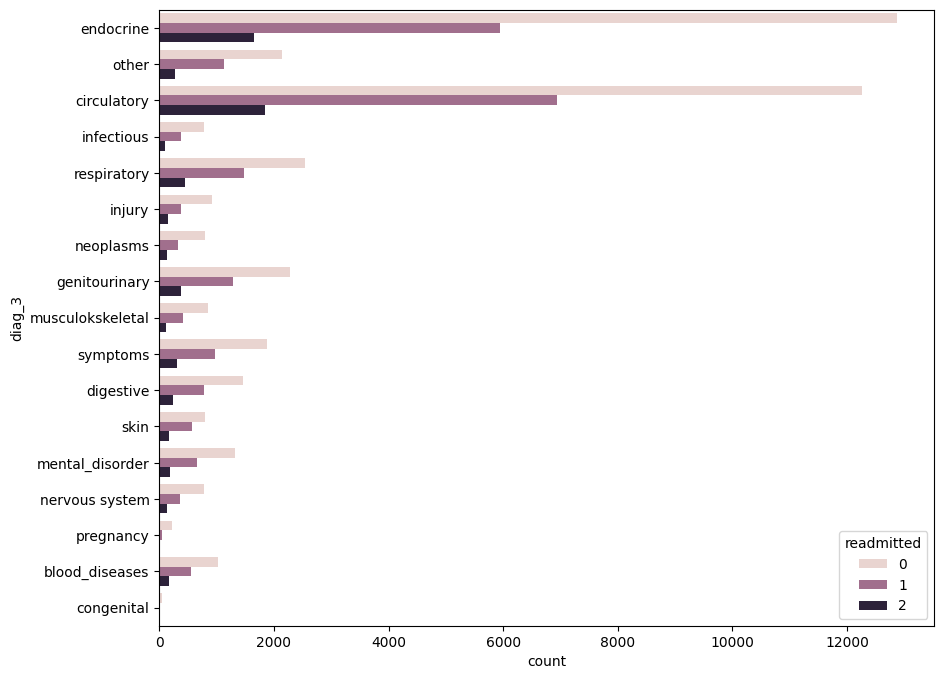

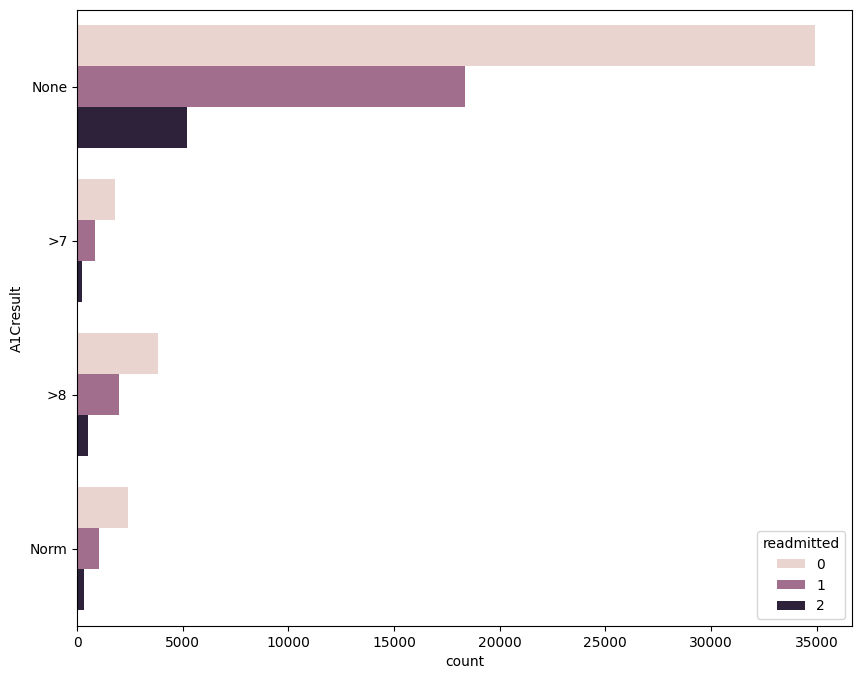

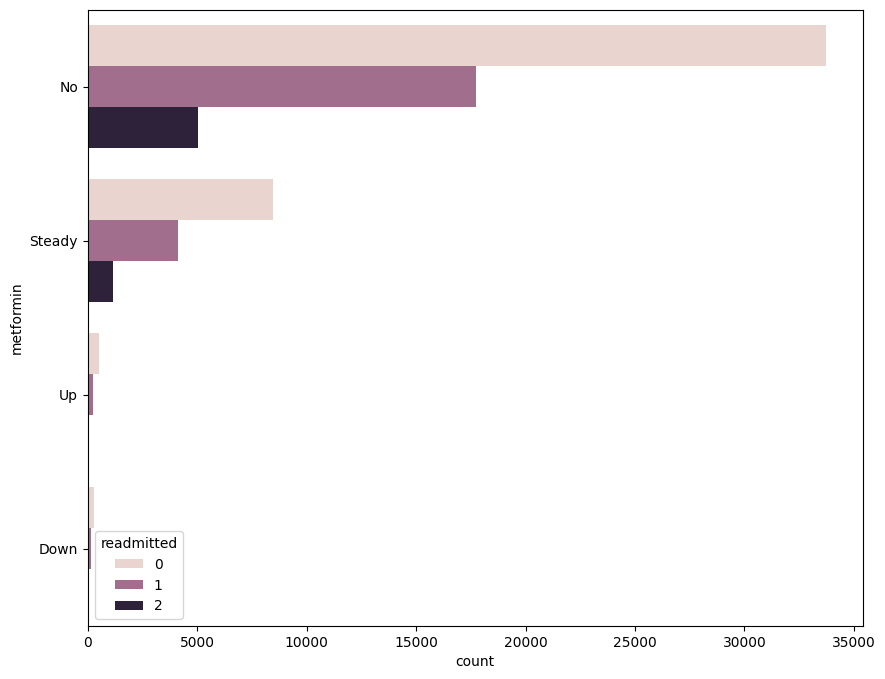

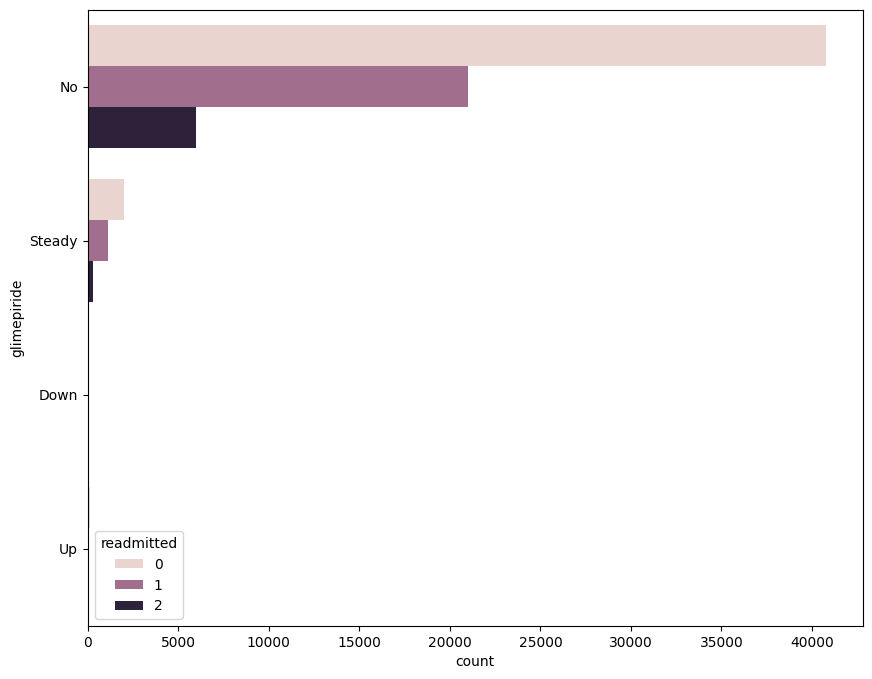

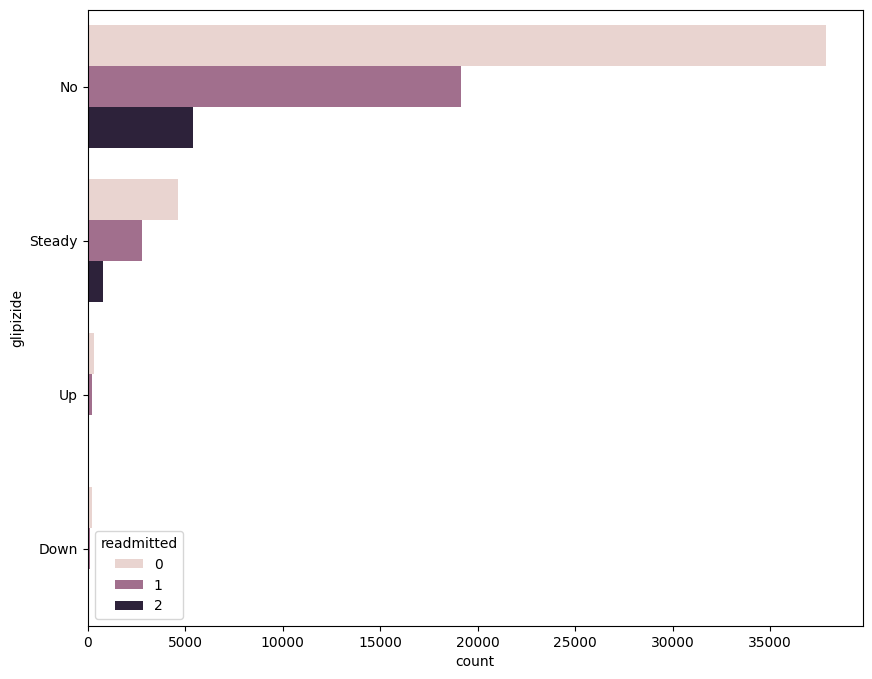

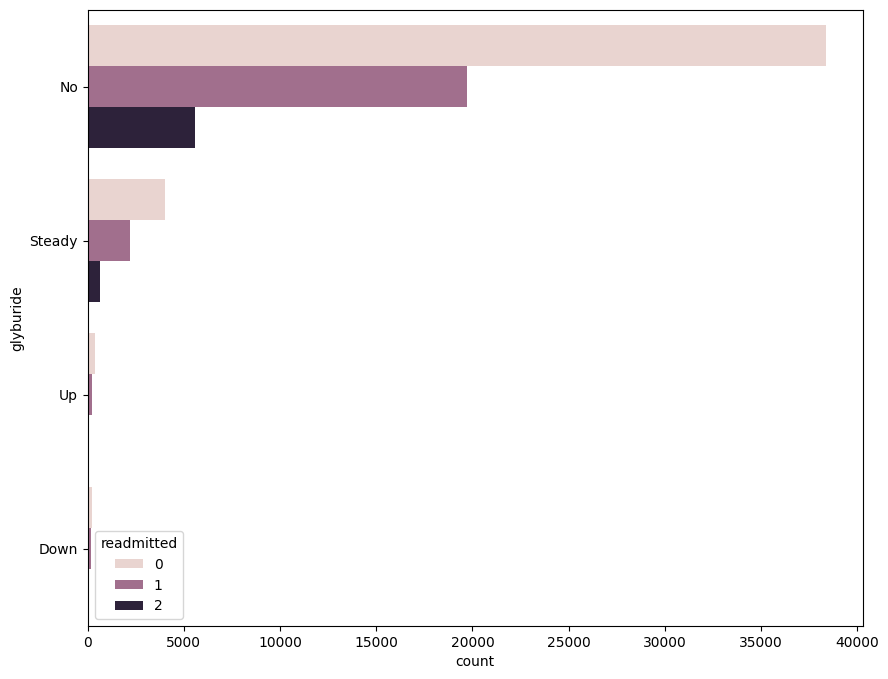

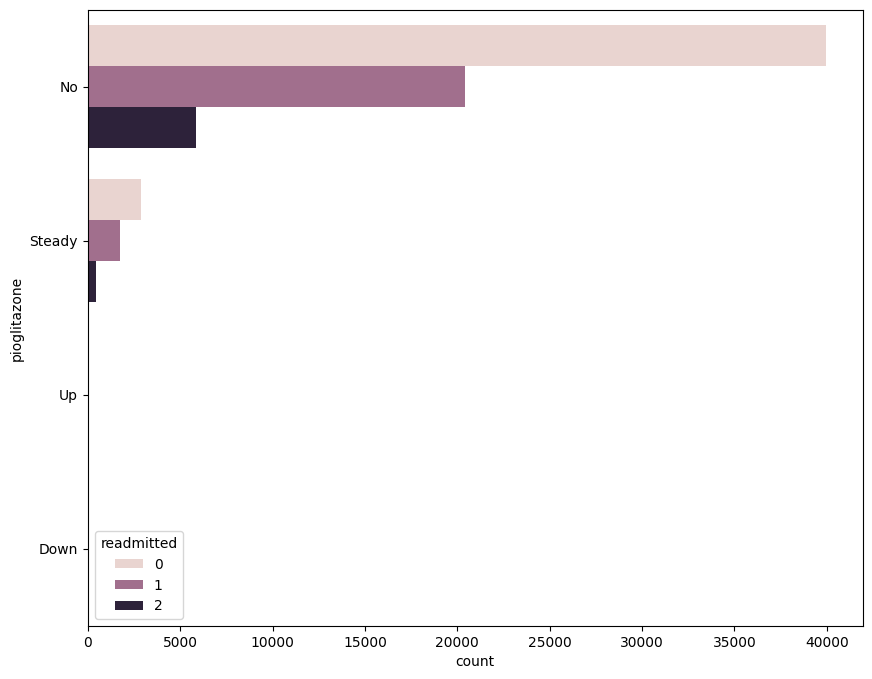

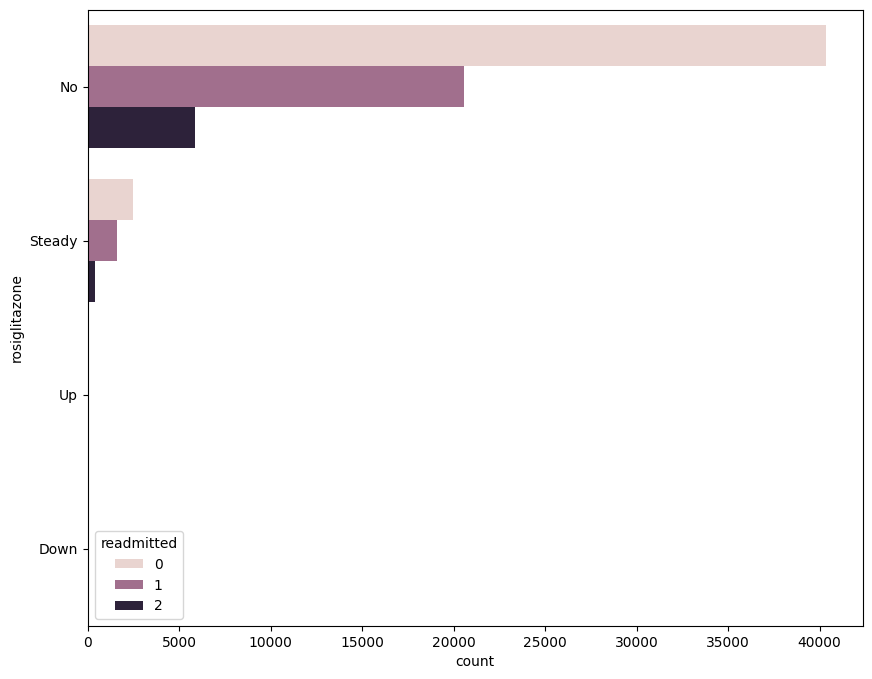

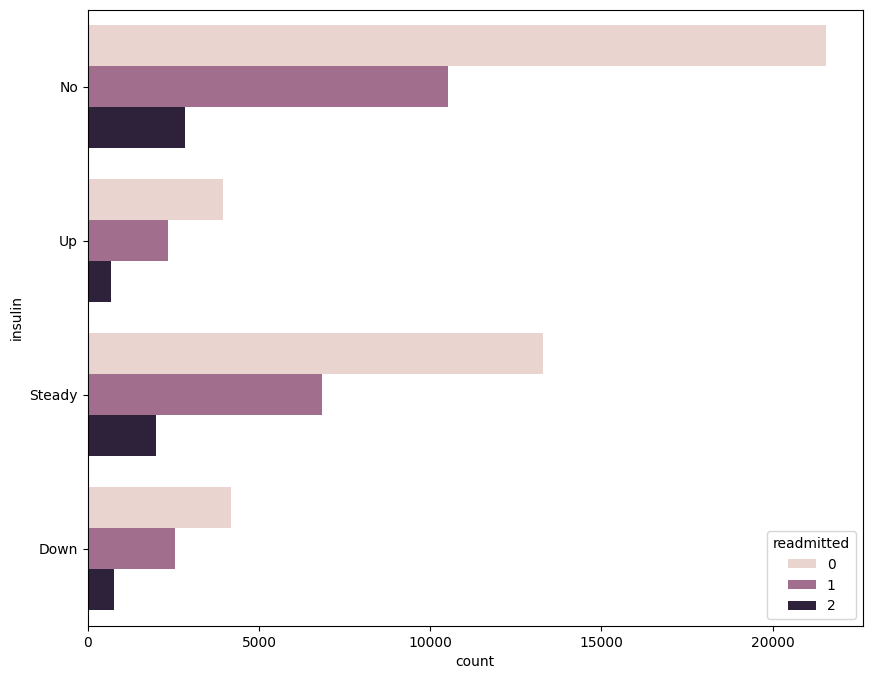

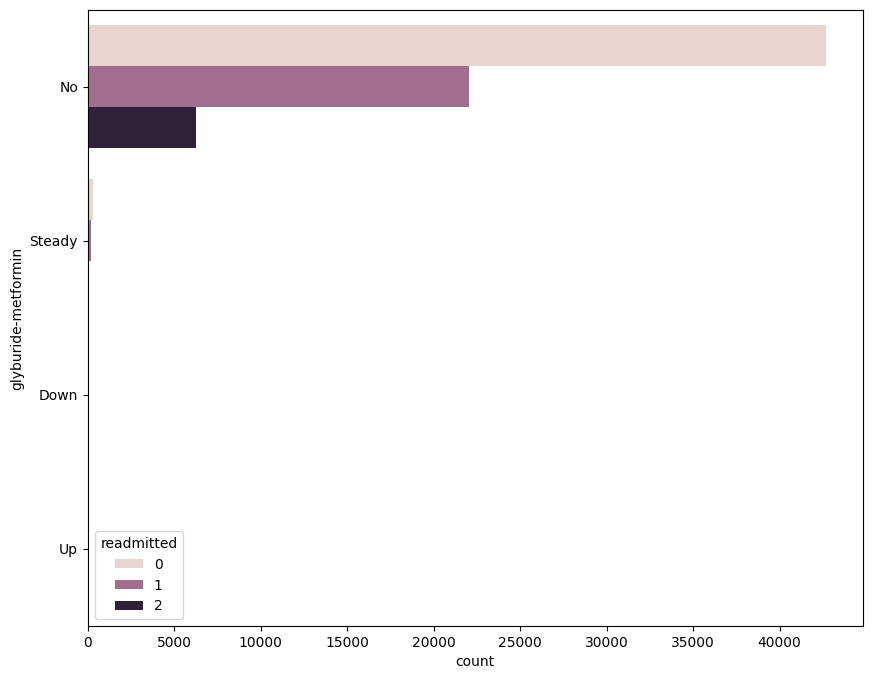

In [ ]:
# visualizing distribution of categorical features
for feature in categorical_column_name:
  plt.figure(figsize=(10,8))
  sns.countplot(y= feature, hue ='readmitted', data=diabetic_df)
  plt.xlabel('count')
  plt.ylabel(feature)
  plt.show()



In [ ]:
diabetic_df.shape

(71503, 30)

In [ ]:
# Apply One-Hot Encoding for categorical data
categorical_data = diabetic_df.select_dtypes(include = 'object')
categorical_column_name = categorical_data.columns.tolist()
diabetic_df = pd.get_dummies (diabetic_df, columns = categorical_column_name)

In [ ]:
diabetic_df.shape

(71503, 138)

## Modelling

In [ ]:
X = diabetic_df.drop(['readmitted'], axis=1)
y = diabetic_df['readmitted']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize



In [ ]:
def roc_curve_plot(y_test, y_prediction):
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_prediction_bin = label_binarize(y_prediction, classes=[0, 1, 2])
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prediction_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(3):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc[i]), lw=2)

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Plot')
    plt.legend()
    plt.show()


In [ ]:
def confusion_matrix_plot(y_test, y_predicted):
  conf_matrix = confusion_matrix(y_test, y_predicted)
  class_labels = ['No', '>30', '<30']
  plt.figure(figsize=(10,6))
  sns.heatmap(conf_matrix, annot= True,fmt='g',xticklabels=class_labels, yticklabels=class_labels,cmap='Greens')
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual Class")
  plt.show()


In [ ]:
model_accuracies = {}
f1_scores ={}

#### OverSampling and Train-Test Split

In [ ]:
X_Sample_train, X_test, y_sample_train, y_test = train_test_split(X, y, test_size =0.1, random_state =42)
#
# view original data distribution
print("original data distribution : ")
print(np.bincount(y))
print("\n")
smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_Sample_train,y_sample_train)

# Naming this as X_train

# view train set distributuion after oversampling
print("train  dataset distribution after oversampling: ")
print(np.bincount(y_train))
print("\n")

# view test set distributuion
print("test  dataset distribution : ")
print(np.bincount(y_test))
print("\n")

original data distribution : 
[42976 22236  6291]


train  dataset distribution after oversampling: 
[38621 38621 38621]


test  dataset distribution : 
[4355 2177  619]




### Single Machine Learning Algorithms

#### 1. Logistic Regression

In [ ]:

lr_model = LogisticRegression(solver ='liblinear',
                              max_iter = 120,
                              fit_intercept= True,
                              class_weight='balanced')
lr_model.fit(X_train, y_train)

# Accuracy for train set
lr_model_prediction = lr_model.predict(X_train)
lr_model_accuracy = accuracy_score(y_train, lr_model_prediction)
print("Logistic Regression Model train Accuracy : " , lr_model_accuracy)

#test prediction
lr_model_prediction = lr_model.predict(X_test)
lr_model_accuracy = accuracy_score(y_test, lr_model_prediction)
print("Logistic Regression Model test Accuracy : " , lr_model_accuracy)
model_accuracies['Logistic Regression'] = lr_model_accuracy
# classification report
report = classification_report(y_test, lr_model_prediction)
print("Classification Report: ")
print(report)
# Confusion matrix
conf_matrix = confusion_matrix(y_test, lr_model_prediction)
print(" Confusion Matrix: ")
print(conf_matrix)

f1_micro =f1_score(y_test, lr_model_prediction, average ='micro')
f1_macro =f1_score(y_test, lr_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, lr_model_prediction, average ='weighted')
f1_scores['Logistic Regression'] = f1_micro


print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Logistic Regression Model train Accuracy :  0.6340678214788155
Logistic Regression Model test Accuracy :  0.6221507481471122
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      4355
           1       0.51      0.16      0.24      2177
           2       0.31      0.02      0.03       619

    accuracy                           0.62      7151
   macro avg       0.49      0.37      0.34      7151
weighted avg       0.57      0.62      0.54      7151

 Confusion Matrix: 
[[4092  254    9]
 [1817  347   13]
 [ 533   76   10]]
F1-SCORE micro:  0.6221507481471122
F1-SCORE macro:  0.34395926017672845
F1-SCORE weighted:  0.5383067665788316


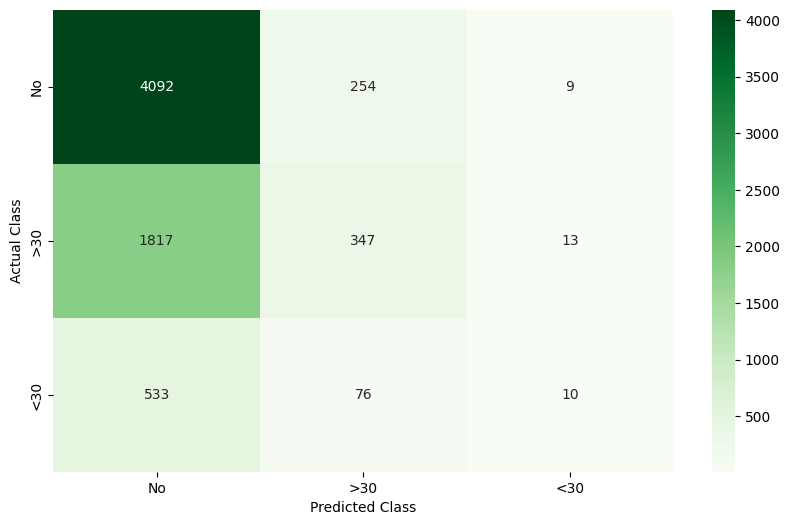

In [ ]:
confusion_matrix_plot(y_test, lr_model_prediction)

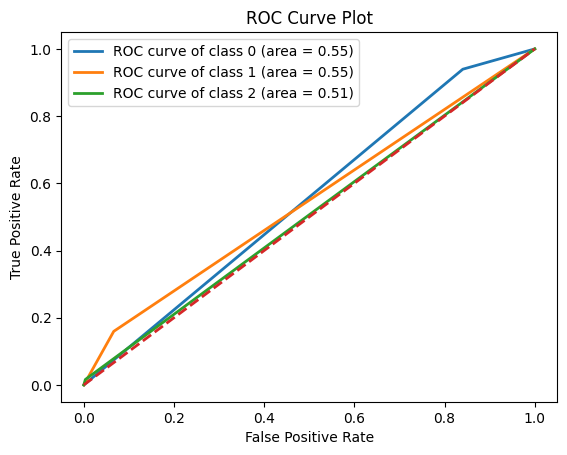

In [ ]:
roc_curve_plot(y_test, lr_model_prediction)

#### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion= 'entropy',
                                             max_depth = 14,
                                             splitter='random',
                                             class_weight='balanced',
                                             min_samples_leaf=4,
                                             min_samples_split=2,
                                             random_state = 42)
decision_tree_model.fit(X_train, y_train)

# Accuracy for train set
decision_tree_prediction = decision_tree_model.predict(X_train)
decision_tree_accuracy = accuracy_score(y_train, decision_tree_prediction)
print("Decision Tree Model train Accuracy : " , decision_tree_accuracy)

# Prediction for test set
decision_tree_prediction = decision_tree_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, decision_tree_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['Decision Tree'] = accuracy
# classification report
report = classification_report(y_test, decision_tree_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, decision_tree_prediction, average ='micro')
f1_macro =f1_score(y_test, decision_tree_prediction, average ='macro')
f1_weighted =f1_score(y_test, decision_tree_prediction, average ='weighted')
f1_scores['Decision Tree'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Decision Tree Model train Accuracy :  0.6385990350672778
Test Accuracy: 0.5718081387218571
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      4355
           1       0.40      0.20      0.27      2177
           2       0.13      0.07      0.09       619

    accuracy                           0.57      7151
   macro avg       0.39      0.37      0.36      7151
weighted avg       0.52      0.57      0.53      7151

F1-SCORE micro:  0.5718081387218571
F1-SCORE macro:  0.3592870899331864
F1-SCORE weighted:  0.5267197251010941


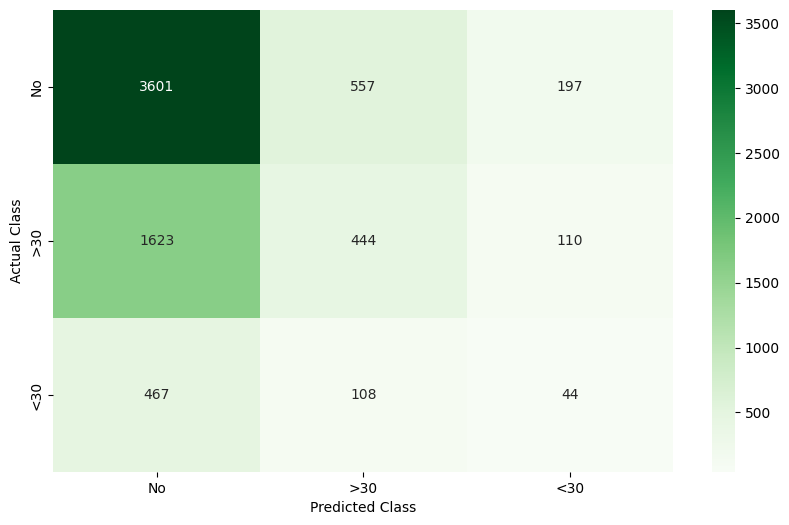

In [ ]:
confusion_matrix_plot(y_test, decision_tree_prediction)

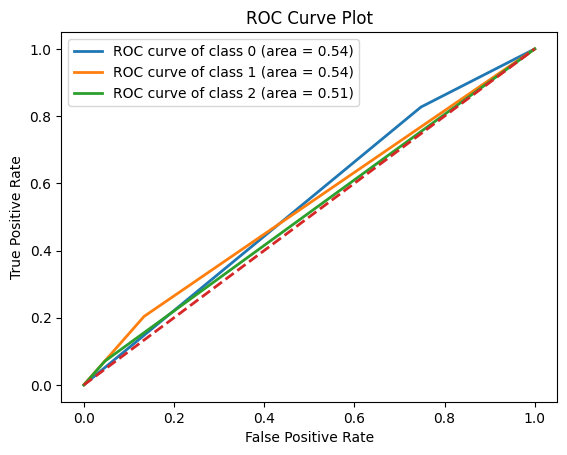

In [ ]:
roc_curve_plot(y_test, decision_tree_prediction)

#### 3. K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors= 8,
                                 weights='uniform',
                                 n_jobs = -1)
knn_model.fit(X_train_scaled, y_train)

# Accuracy for train set
knn_model_prediction = knn_model.predict(X_train_scaled)
# Accuracy for test set
accuracy = accuracy_score(y_train, knn_model_prediction)
print('KNN model train Accuracy:', accuracy)

# Prediction for test set
knn_model_prediction = knn_model.predict(X_test_scaled)
# Accuracy for test set
accuracy = accuracy_score(y_test, knn_model_prediction)
print('KNN model Test Accuracy:', accuracy)
model_accuracies['KNN'] = accuracy
# classification report
report = classification_report(y_test, knn_model_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, knn_model_prediction, average ='micro')
f1_macro =f1_score(y_test, knn_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, knn_model_prediction, average ='weighted')
f1_scores['KNN'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

KNN model train Accuracy: 0.719315053123085
KNN model Test Accuracy: 0.5457977905188086
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      4355
           1       0.36      0.25      0.30      2177
           2       0.16      0.12      0.14       619

    accuracy                           0.55      7151
   macro avg       0.39      0.38      0.38      7151
weighted avg       0.51      0.55      0.52      7151

F1-SCORE micro:  0.5457977905188086
F1-SCORE macro:  0.3753675741003042
F1-SCORE weighted:  0.5226793914439786


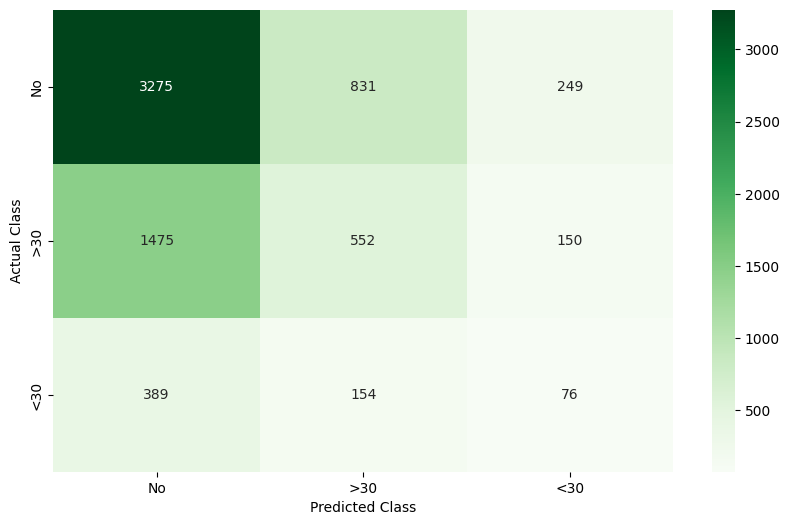

In [ ]:
confusion_matrix_plot(y_test, knn_model_prediction )

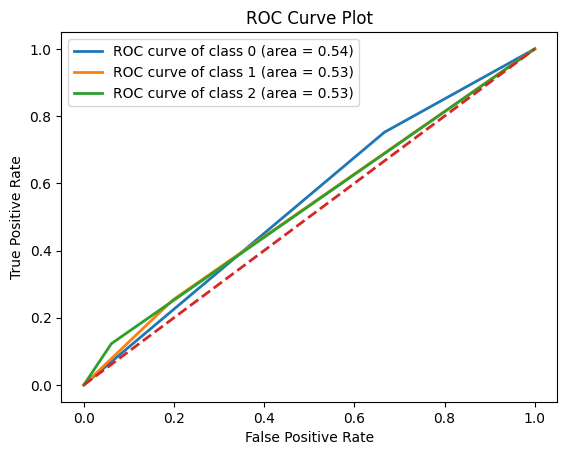

In [ ]:
roc_curve_plot(y_test, knn_model_prediction)

#### 4. Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
nb_model = MultinomialNB(alpha= 0.5, force_alpha=False)
nb_model.fit(X_train_scaled, y_train)



# Prediction for train set
nb_model_train_prediction = nb_model.predict(X_train_scaled)
# Accuracy for train set
accuracy = accuracy_score(y_train, nb_model_train_prediction)
print('Naive Bayes Train Accuracy:', accuracy)


# Prediction for test set
nb_model_prediction = nb_model.predict(X_test_scaled)
# Accuracy for test set
accuracy = accuracy_score(y_test, nb_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['Naive Bayes'] = accuracy
# classification report
report = classification_report(y_test, nb_model_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, nb_model_prediction, average ='micro')
f1_macro =f1_score(y_test, nb_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, nb_model_prediction, average ='weighted')
f1_scores['Naive Bayes'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Naive Bayes Train Accuracy: 0.575559065447986
Test Accuracy: 0.5305551671094951
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      4355
           1       0.37      0.42      0.39      2177
           2       0.12      0.06      0.08       619

    accuracy                           0.53      7151
   macro avg       0.38      0.38      0.38      7151
weighted avg       0.52      0.53      0.52      7151

F1-SCORE micro:  0.5305551671094951
F1-SCORE macro:  0.37718822493141113
F1-SCORE weighted:  0.5245178568186477


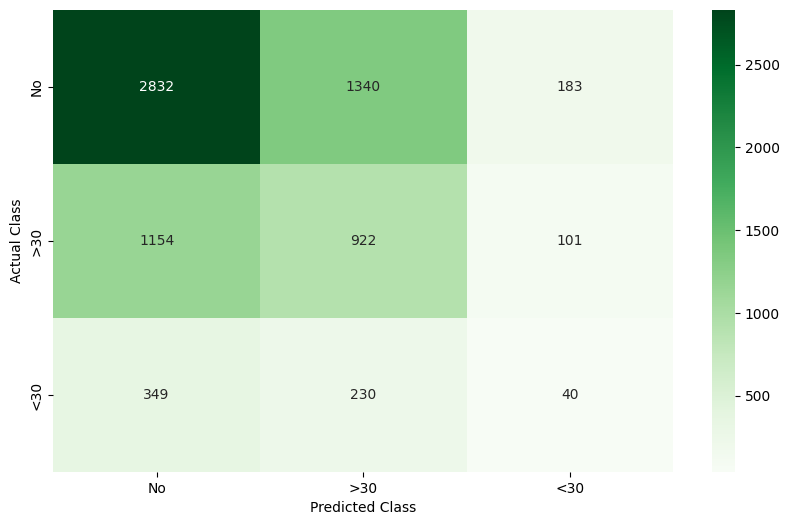

In [ ]:
confusion_matrix_plot(y_test, nb_model_prediction)

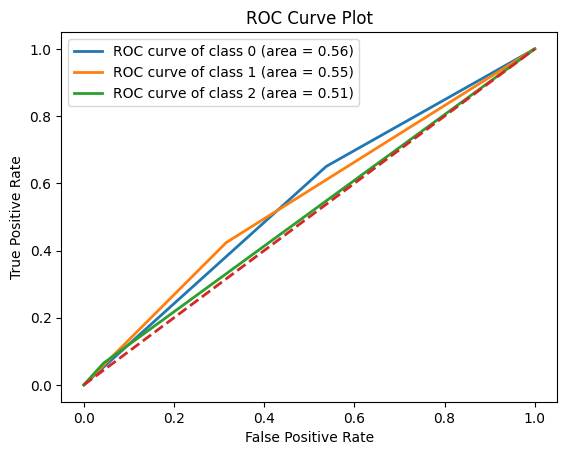

In [ ]:
roc_curve_plot(y_test, nb_model_prediction)

#### 5. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

support_vector_model = SVC(C = 1.5, kernel = 'rbf',
                           class_weight='balanced',
                           gamma='auto',
                           probability=False, random_state= 42)
support_vector_model.fit(X_train, y_train)

svm_model_prediction = support_vector_model.predict(X_train)
# Accuracy for train set
accuracy = accuracy_score(y_train, svm_model_prediction)
print('SVM train Accuracy:', accuracy)

svm_model_prediction = support_vector_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, svm_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['SVM'] = accuracy
# classification report
report = classification_report(y_test, svm_model_prediction)
print("Classification Report: ")
print(report)


f1_micro =f1_score(y_test, svm_model_prediction, average ='micro')
f1_macro =f1_score(y_test, svm_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, svm_model_prediction, average ='weighted')
f1_scores['SVM'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

SVM train Accuracy: 0.6748832673070781
Test Accuracy: 0.6173961683680604
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.95      0.76      4355
           1       0.48      0.12      0.19      2177
           2       0.33      0.00      0.01       619

    accuracy                           0.62      7151
   macro avg       0.48      0.36      0.32      7151
weighted avg       0.56      0.62      0.52      7151

F1-SCORE micro:  0.6173961683680604
F1-SCORE macro:  0.3192375630688316
F1-SCORE weighted:  0.5202685547388856


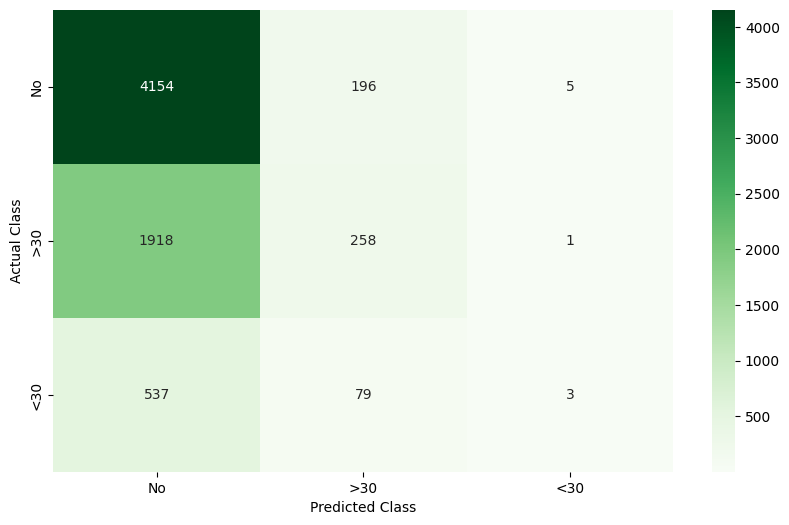

In [ ]:
confusion_matrix_plot(y_test, svm_model_prediction)

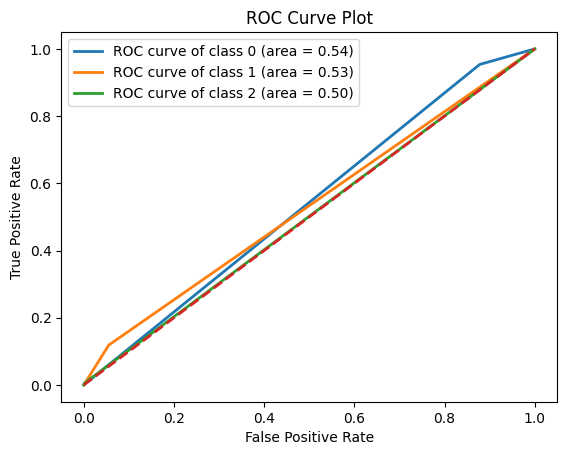

In [ ]:
roc_curve_plot(y_test, svm_model_prediction)

### Ensemble Learning Algorithms

#### 6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


rf_model = RandomForestClassifier(criterion='entropy',
                                  n_estimators= 130,
                                  max_features= 50,
                                  max_depth=15,
                                  bootstrap=True,
                                  n_jobs=-1,
                                  random_state=42)
rf_model.fit(X_train, y_train)


rf_model_prediction = rf_model.predict(X_train)
# Accuracy for train set
accuracy = accuracy_score(y_train, rf_model_prediction)
print('Random Forest Train Accuracy:', accuracy)

rf_model_prediction = rf_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, rf_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['Random Forest'] = accuracy
# classification report
report = classification_report(y_test, rf_model_prediction)
print("Classification Report: ")
print(report)
f1_micro =f1_score(y_test, rf_model_prediction, average ='micro')
f1_macro =f1_score(y_test, rf_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, rf_model_prediction, average ='weighted')
f1_scores['Random Forest'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Random Forest Train Accuracy: 0.7854362479825311
Test Accuracy: 0.6119423856803244
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.91      0.75      4355
           1       0.49      0.18      0.27      2177
           2       0.22      0.05      0.08       619

    accuracy                           0.61      7151
   macro avg       0.45      0.38      0.36      7151
weighted avg       0.55      0.61      0.54      7151

F1-SCORE micro:  0.6119423856803244
F1-SCORE macro:  0.363603517863341
F1-SCORE weighted:  0.5430817636312042


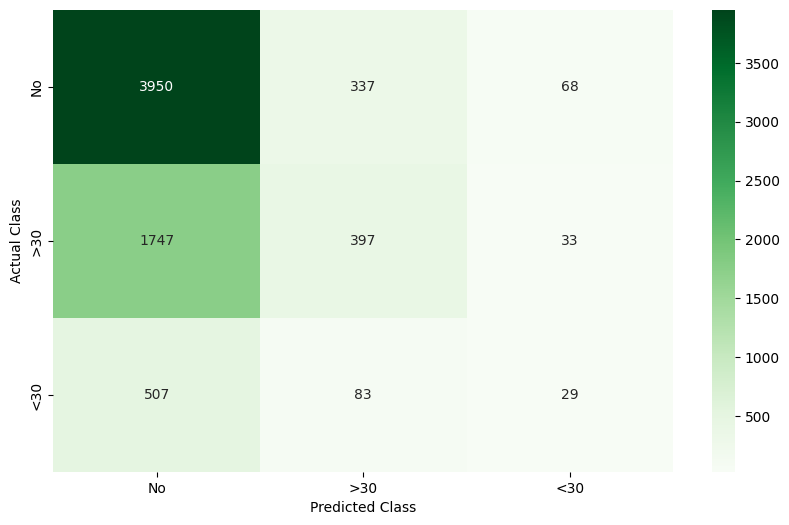

In [ ]:
confusion_matrix_plot(y_test, rf_model_prediction )

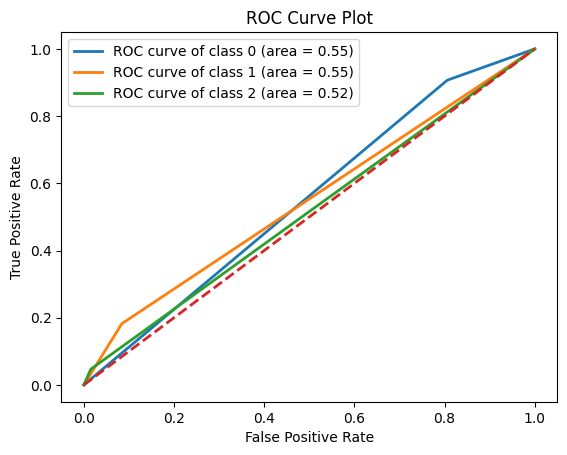

In [ ]:
roc_curve_plot(y_test, rf_model_prediction)

#### 7. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model = GradientBoostingClassifier(learning_rate=0.08,
                                          loss='log_loss',
                                          criterion='squared_error',
                                          max_depth= 8,
                                          max_features = 100,
                                          random_state = 30,
                                          subsample =0.8,
                                          n_estimators =120)
gboost_model.fit(X_train, y_train)


# Accuracy for train set
gboost_model_train_prediction = gboost_model.predict(X_train)
accuracy = accuracy_score(y_train, gboost_model_train_prediction)
print('Gradient boosting train Accuracy:', accuracy)


gboost_model_prediction = gboost_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, gboost_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['Gradient Boosting'] = accuracy
# classification report
report = classification_report(y_test, gboost_model_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, gboost_model_prediction, average ='micro')
f1_macro =f1_score(y_test, gboost_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, gboost_model_prediction, average ='weighted')
f1_scores['Gradient Boosting'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Gradient boosting train Accuracy: 0.735653314690626
Test Accuracy: 0.6087260523003776
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      4355
           1       0.45      0.26      0.33      2177
           2       0.16      0.02      0.03       619

    accuracy                           0.61      7151
   macro avg       0.42      0.38      0.37      7151
weighted avg       0.55      0.61      0.56      7151

F1-SCORE micro:  0.6087260523003776
F1-SCORE macro:  0.369383012556678
F1-SCORE weighted:  0.5555764670167636


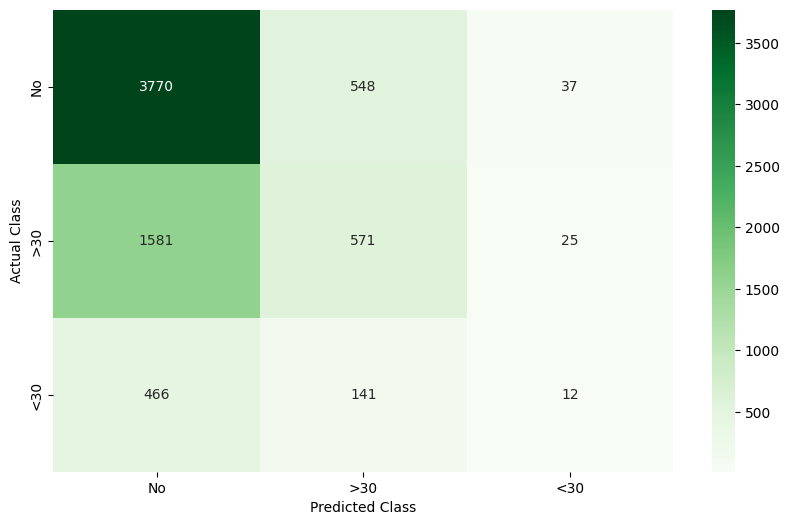

In [ ]:
confusion_matrix_plot(y_test, gboost_model_prediction)

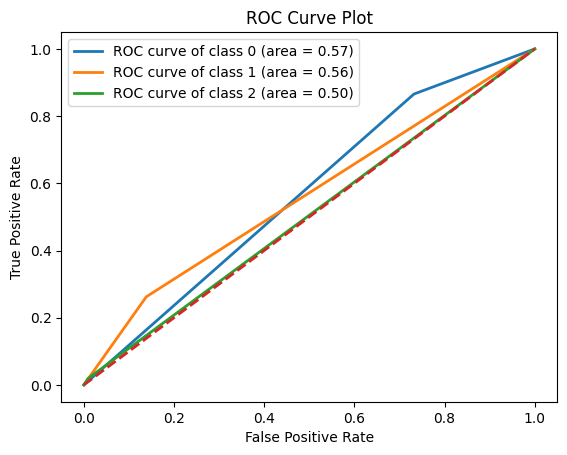

In [ ]:
roc_curve_plot(y_test, gboost_model_prediction)

#### 8. BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion= 'entropy',
                                             max_depth = 13,
                                             splitter='random',
                                             class_weight='balanced',
                                             min_samples_leaf=4,
                                             min_samples_split=2,
                                             random_state = 42)
bagg_model = BaggingClassifier(estimator = decision_tree_model,
                               n_estimators = 50,
                               max_features = 60,
                               bootstrap = False,
                               n_jobs =-1,
                               random_state = 12)

bagg_model.fit(X_train, y_train)


# Accuracy for train set
bagging_model_train_prediction = bagg_model.predict(X_train)
accuracy = accuracy_score(y_train, bagging_model_train_prediction)
print('Bagging Classifier Train Accuracy:', accuracy)


bagging_model_prediction = bagg_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, bagging_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['bagging'] = accuracy
# classification report
report = classification_report(y_test, bagging_model_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, bagging_model_prediction, average ='micro')
f1_macro =f1_score(y_test, bagging_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, bagging_model_prediction, average ='weighted')
f1_scores['Bagging'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Bagging Classifier Train Accuracy: 0.689607553748824
Test Accuracy: 0.6035519507761152
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.90      0.74      4355
           1       0.46      0.17      0.25      2177
           2       0.18      0.04      0.07       619

    accuracy                           0.60      7151
   macro avg       0.42      0.37      0.35      7151
weighted avg       0.54      0.60      0.53      7151

F1-SCORE micro:  0.6035519507761152
F1-SCORE macro:  0.35262562417062643
F1-SCORE weighted:  0.5339021706531712


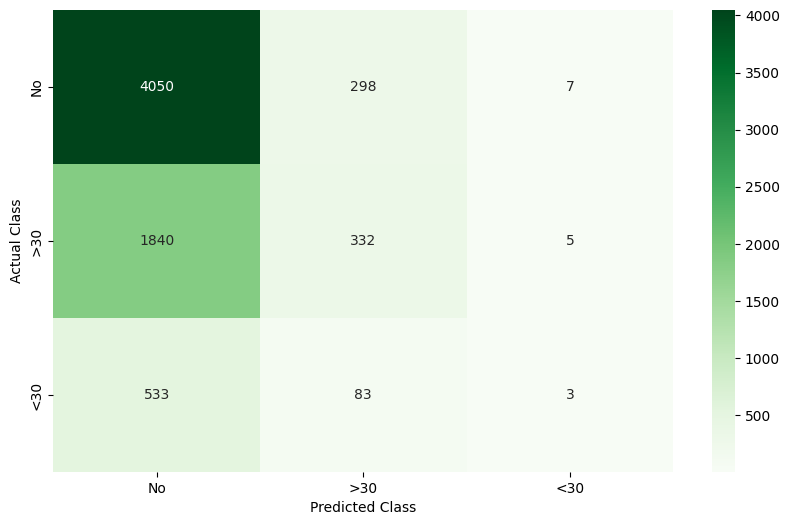

In [ ]:
confusion_matrix_plot(y_test, bagging_model_prediction)

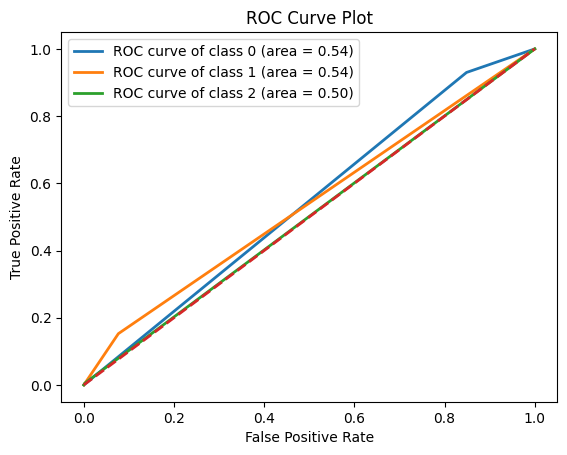

In [ ]:
roc_curve_plot(y_test, bagging_model_prediction)

#### 9. Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion= 'entropy',
                                             max_depth = 13,
                                             splitter='random',
                                             class_weight='balanced',
                                             min_samples_leaf=4,
                                             min_samples_split=2,
                                             random_state = 42)
adaboost_model = AdaBoostClassifier(estimator = decision_tree_model,
                                    n_estimators = 40,
                                    learning_rate = 0.005,
                                    random_state = 12)

adaboost_model.fit(X_train, y_train)

# Accuracy for train set
adaboost_model_train_prediction = adaboost_model.predict(X_train)
accuracy = accuracy_score(y_train, adaboost_model_train_prediction)
print('Adaboost Train Accuracy:', accuracy)

adaboost_model_prediction = adaboost_model.predict(X_test)
# Accuracy for test set
accuracy = accuracy_score(y_test, adaboost_model_prediction)
print('Test Accuracy:', accuracy)
model_accuracies['Adaboost'] = accuracy
# classification report
report = classification_report(y_test, adaboost_model_prediction)
print("Classification Report: ")
print(report)

f1_micro =f1_score(y_test, adaboost_model_prediction, average ='micro')
f1_macro =f1_score(y_test, adaboost_model_prediction, average ='macro')
f1_weighted =f1_score(y_test, adaboost_model_prediction, average ='weighted')
f1_scores['Adaboost'] = f1_micro
print("F1-SCORE micro: ", f1_micro)
print("F1-SCORE macro: ", f1_macro)
print("F1-SCORE weighted: ", f1_weighted)

Adaboost Train Accuracy: 0.7749669868724269
Test Accuracy: 0.58970773318417
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.84      0.73      4355
           1       0.41      0.25      0.31      2177
           2       0.18      0.04      0.06       619

    accuracy                           0.59      7151
   macro avg       0.41      0.38      0.37      7151
weighted avg       0.53      0.59      0.54      7151

F1-SCORE micro:  0.58970773318417
F1-SCORE macro:  0.36789916952060847
F1-SCORE weighted:  0.542879774152701


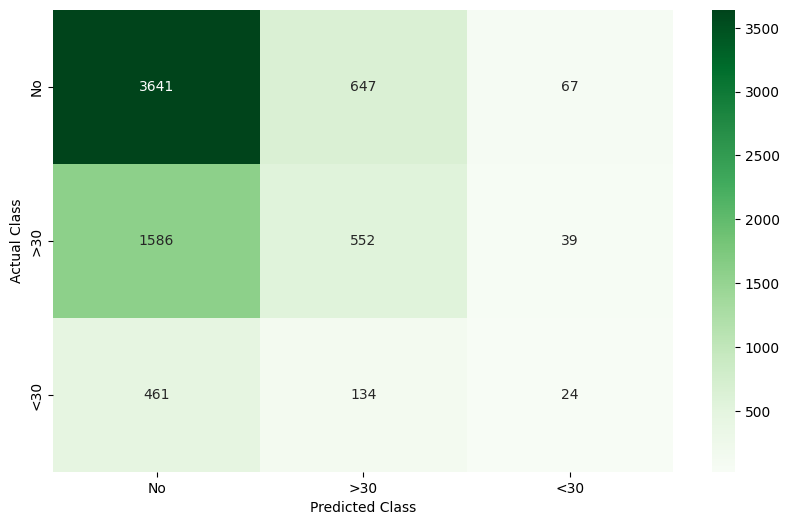

In [ ]:
confusion_matrix_plot(y_test, adaboost_model_prediction)

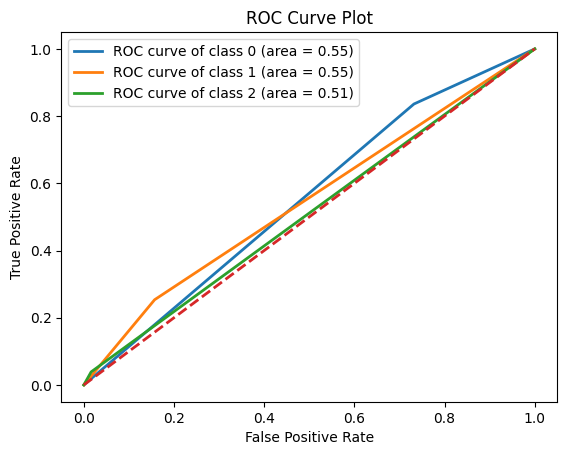

In [ ]:
roc_curve_plot(y_test, adaboost_model_prediction)

#### Comparing Model Accuracy

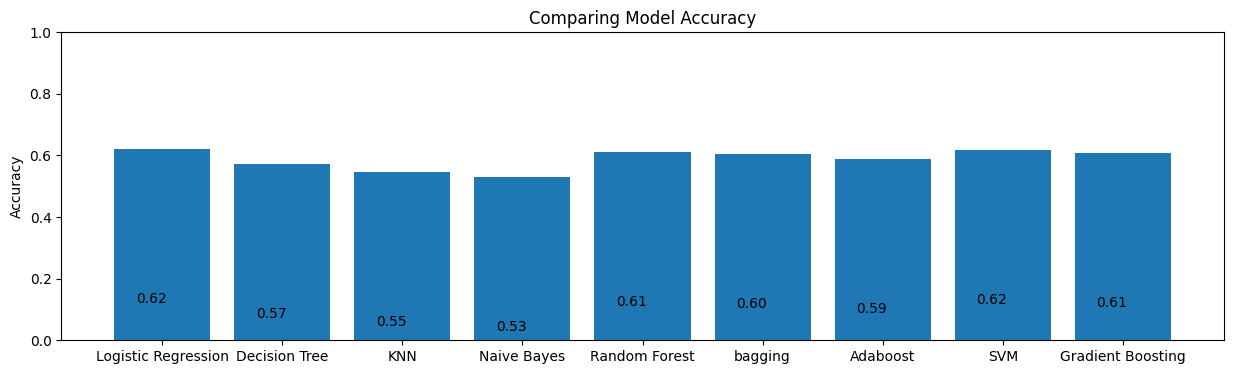

In [ ]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())
plt.figure(figsize=(15, 4))
bars = plt.bar(model_names, accuracies)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparing Model Accuracy')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + 0.18,
             bar.get_height() -0.5,
             f'{acc:.2f}' )

plt.show()

#### Comparing F1-score

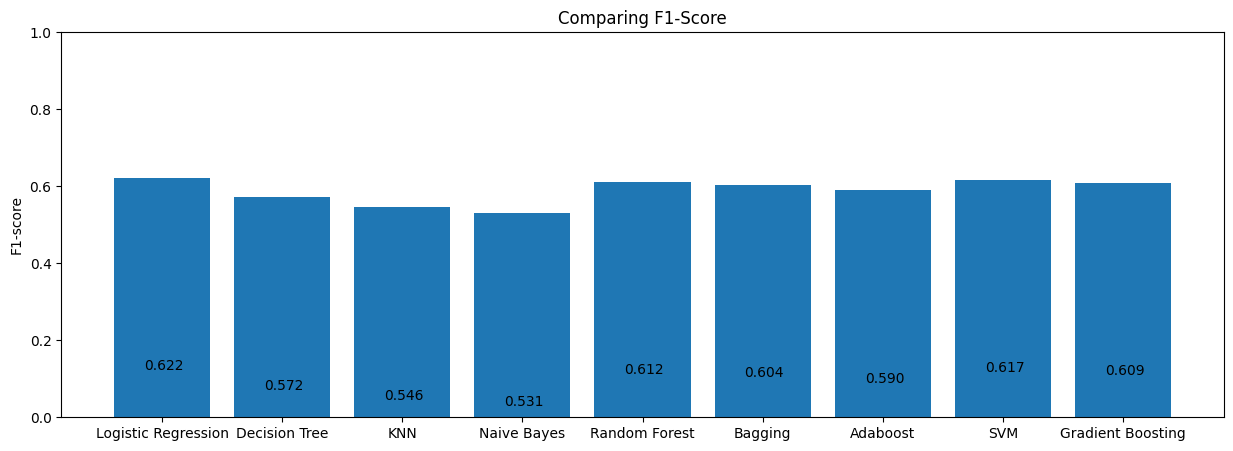

In [ ]:
model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())
plt.figure(figsize=(15, 5))
bars = plt.bar(model_names, f1_values)
plt.title('Comparing F1-Score')
plt.ylim(0,1)
plt.ylabel('F1-score')
for bar, f1 in zip(bars, f1_values):
    plt.text(bar.get_x() + 0.25,
             bar.get_height() -0.5,
             f'{f1:.3f}' )
plt.show()